# **Preprocessing Data**

1. Import modul untuk pembersihan teks, tokenisasi, analisis teks, dan manipulasi data numerik jika diperlukan dalam proses preprocessing.

In [14]:
import pandas as pd
import numpy as np
import nltk
import string
import re

2. Masukan file dataset yang akan diproses.

In [15]:
def load_data():
    data_tweets = pd.read_csv('crawling-data_kebakaran-bromo.csv')
    return data_tweets

tweets = load_data()
tweets

,Tweets,id tweets,date tweets,username,id user,quote count,reply count,retweet count,favorite count,url tweets
0,@duniabulat5 @CNNIndonesia Nk musim kemarau pa...,1.699248e+18,2023-09-06 02:27:41+00:00,sugikchan,7.603762e+17,0,0,0,2,https://twitter.com/sugikchan/status/169924796...
1,Seng prewed sampek ngarai kebakaran nang bromo...,1.699446e+18,2023-09-06 15:35:33+00:00,orange_puppy331,1.328167e+18,0,0,0,0,https://twitter.com/orange_puppy331/status/169...
2,Kakeane kebakaran bromo wes dipadamke seminggu...,1.699474e+18,2023-09-06 17:26:36+00:00,andriawan98,4.380398e+08,0,0,0,0,https://twitter.com/andriawan98/status/1699474...
3,Kenapa kemping di Savana Bromo dilarang? Ya ka...,1.699518e+18,2023-09-06 20:18:58+00:00,brigittasiw,3.036276e+08,0,1,0,1,https://twitter.com/brigittasiw/status/1699517...
4,@infomitigasi @RadioElshinta @KementerianLHK K...,1.699570e+18,2023-09-06 23:46:16+00:00,tamiya_mf01x,1.674140e+18,0,0,0,0,https://twitter.com/tamiya_mf01x/status/169956...
...,...,...,...,...,...,...,...,...,...,...
1435,Eh skrng setelah kebakaran itu si bromo nasibn...,1.714124e+18,2023-10-17 03:38:55+00:00,knia2851,1.655280e+18,0,1,0,0,https://twitter.com/knia2851/status/1714123799...
1436,Padang savana Bromo sempat mengering akibat fo...,1.714163e+18,2023-10-17 06:14:37+00:00,IDNTimesJatim,1.318894e+18,0,0,2,4,https://twitter.com/IDNTimesJatim/status/17141...
1437,Fakta Kawasan Bromo yang Kembali Menghijau Usa...,1.714200e+18,2023-10-17 08:40:56+00:00,aboutmalang_com,1.668262e+18,0,0,0,0,https://twitter.com/aboutmalang_com/status/171...
1438,#VIRAL Pasti udah tau banyak banget berita s...,1.714204e+18,2023-10-17 08:56:35+00:00,rapmafmums,5.758456e+08,0,0,0,0,https://twitter.com/rapmafmums/status/17142037...


3. Cleaning.
Disini ada dua tahapan cleaning; cleaning username, dan cleaning menghapus karakter tanda baca, emoticon, numerik, link dsb. Proses ini menggunakan loop dengan modul re.

In [16]:
#menghapus username dalam tweet
def remove_pattern(Text, pattern):
    r = re.findall(pattern, str(Text))
    for i in r:
        Text = re.sub(i, '', str(Text))
    return Text
tweets['remove_user'] = np.vectorize(remove_pattern)(tweets['Tweets'], "@[\w]*")
tweets.head()

,Tweets,id tweets,date tweets,username,id user,quote count,reply count,retweet count,favorite count,url tweets,remove_user
0,@duniabulat5 @CNNIndonesia Nk musim kemarau pa...,1.699248e+18,2023-09-06 02:27:41+00:00,sugikchan,7.603762e+17,0,0,0,2,https://twitter.com/sugikchan/status/169924796...,Nk musim kemarau panjang hampir hutan di jat...
1,Seng prewed sampek ngarai kebakaran nang bromo...,1.699446e+18,2023-09-06 15:35:33+00:00,orange_puppy331,1.328167e+18,0,0,0,0,https://twitter.com/orange_puppy331/status/169...,Seng prewed sampek ngarai kebakaran nang bromo...
2,Kakeane kebakaran bromo wes dipadamke seminggu...,1.699474e+18,2023-09-06 17:26:36+00:00,andriawan98,4.380398e+08,0,0,0,0,https://twitter.com/andriawan98/status/1699474...,Kakeane kebakaran bromo wes dipadamke seminggu...
3,Kenapa kemping di Savana Bromo dilarang? Ya ka...,1.699518e+18,2023-09-06 20:18:58+00:00,brigittasiw,3.036276e+08,0,1,0,1,https://twitter.com/brigittasiw/status/1699517...,Kenapa kemping di Savana Bromo dilarang? Ya ka...
4,@infomitigasi @RadioElshinta @KementerianLHK K...,1.699570e+18,2023-09-06 23:46:16+00:00,tamiya_mf01x,1.674140e+18,0,0,0,0,https://twitter.com/tamiya_mf01x/status/169956...,Kalau TNBTS keseluruhan berapa min ?? Kan B...


In [17]:
#cleaning
def cleaning(Text):
    Text = re.sub(r'\$\w*', '', Text)         #digunakan untuk menghapus semua kata yang dimulai dengan tanda dolar ($) dan diikuti oleh karakter huruf, angka, atau garis bawah.      #
    Text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', Text)     #untuk menghapus semua URL atau tautan web dari teks.
    Text = re.sub('&quot;'," ", Text)         #Digunakan untuk menggantikan setiap kemunculan `&quot;` dengan spasi kosong dalam kolom `text`.
    Text = re.sub(r"\d+", " ", str(Text))         #digunakan untuk menggantikan semua angka dalam teks yang disimpan dalam kolom `text` dengan spasi kosong.
    Text = re.sub(r"\b[a-zA-Z]\b", "", str(Text))     #digunakan untuk menghapus semua kata tunggal dalam teks yang disimpan dalam kolom `text`.
    Text = re.sub(r"[^\w\s]", " ", str(Text))         #digunakan untuk menggantikan semua karakter non-alphanumerik dan non-spasi dalam teks yang disimpan dalam variabel `content` dengan spasi kosong.
    Text = re.sub(r'(.)\1+', r'\1\1', Text)         #Digunakan untuk mengganti dua atau lebih karakter berulang dalam teks dengan hanya dua karakter yang berulang. Misalnya, jika terdapat karakter berulang "eeeee" dalam teks, maka akan digantikan dengan "ee".
    Text = re.sub(r"\s+", " ", str(Text))       #digunakan untuk menggantikan satu atau lebih spasi berturut-turut dalam teks
    Text = re.sub(r'#', '', Text)         #digunakan untuk menghapus semua tanda pagar (#) dalam teks
    Text = re.sub(r'[^a-zA-z0-9]', ' ', str(Text))    #Digunakan untuk menggantikan semua karakter non-alphanumerik dalam teks dengan spasi kosong, sehingga menghapus karakter-karakter tersebut dari teks dan mempertahankan hanya huruf (kapital dan kecil) serta angka.
    Text = re.sub(r'\b\w{1,2}\b', '', Text)     #digunakan untuk menghapus kata-kata dengan panjang satu atau dua karakter dalam teks
    Text = re.sub(r'\s\s+', ' ', Text)      #Digunakan untuk menggantikan dua atau lebih spasi berturut-turut dalam teks dengan satu spasi tunggal.
    Text = re.sub(r'^RT[\s]+', '', Text)        #menghapus RT
    Text = re.sub(r'^b[\s]+', '', Text)       #digunakan untuk menghapus spasi di awal teks
    Text = re.sub(r'^link[\s]+', '', Text)      #digunakan untuk menghapus string "link" yang diikuti oleh spasi di awal teks
    return Text

def remove_emoji(Text):
    emoji = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # simbol & piktogram
                        u"\U0001F680-\U0001F6FF"  # transportasi & simbol peralatan
                        u"\U0001F1E0-\U0001F1FF"  # bendera negara
                        u"\U00002702-\U000027B0"  # simbol
                        u"\U000024C2-\U0001F251"  # emoji lainnya
                        "]+", flags=re.UNICODE)
    return emoji.sub(r'', Text)

tweets['cleaning'] = tweets['remove_user'].apply(cleaning)
tweets.head()

,Tweets,id tweets,date tweets,username,id user,quote count,reply count,retweet count,favorite count,url tweets,remove_user,cleaning
0,@duniabulat5 @CNNIndonesia Nk musim kemarau pa...,1.699248e+18,2023-09-06 02:27:41+00:00,sugikchan,7.603762e+17,0,0,0,2,https://twitter.com/sugikchan/status/169924796...,Nk musim kemarau panjang hampir hutan di jat...,musim kemarau panjang hampir hutan jatim keba...
1,Seng prewed sampek ngarai kebakaran nang bromo...,1.699446e+18,2023-09-06 15:35:33+00:00,orange_puppy331,1.328167e+18,0,0,0,0,https://twitter.com/orange_puppy331/status/169...,Seng prewed sampek ngarai kebakaran nang bromo...,Seng prewed sampek ngarai kebakaran nang bromo...
2,Kakeane kebakaran bromo wes dipadamke seminggu...,1.699474e+18,2023-09-06 17:26:36+00:00,andriawan98,4.380398e+08,0,0,0,0,https://twitter.com/andriawan98/status/1699474...,Kakeane kebakaran bromo wes dipadamke seminggu...,Kakeane kebakaran bromo wes dipadamke seminggu...
3,Kenapa kemping di Savana Bromo dilarang? Ya ka...,1.699518e+18,2023-09-06 20:18:58+00:00,brigittasiw,3.036276e+08,0,1,0,1,https://twitter.com/brigittasiw/status/1699517...,Kenapa kemping di Savana Bromo dilarang? Ya ka...,Kenapa kemping Savana Bromo dilarang karena in...
4,@infomitigasi @RadioElshinta @KementerianLHK K...,1.699570e+18,2023-09-06 23:46:16+00:00,tamiya_mf01x,1.674140e+18,0,0,0,0,https://twitter.com/tamiya_mf01x/status/169956...,Kalau TNBTS keseluruhan berapa min ?? Kan B...,Kalau TNBTS keseluruhan berapa min Kan BROMO ...


4. Remove Duplikat Data.
Tahapan untuk menghapus dataset yang sama dengan menetapkan 1 dataset utama.

In [18]:
#remove data duplikat dari kolom cleaning
tweets.drop_duplicates(subset = "cleaning", keep = 'first', inplace = True)
tweets

,Tweets,id tweets,date tweets,username,id user,quote count,reply count,retweet count,favorite count,url tweets,remove_user,cleaning
0,@duniabulat5 @CNNIndonesia Nk musim kemarau pa...,1.699248e+18,2023-09-06 02:27:41+00:00,sugikchan,7.603762e+17,0,0,0,2,https://twitter.com/sugikchan/status/169924796...,Nk musim kemarau panjang hampir hutan di jat...,musim kemarau panjang hampir hutan jatim keba...
1,Seng prewed sampek ngarai kebakaran nang bromo...,1.699446e+18,2023-09-06 15:35:33+00:00,orange_puppy331,1.328167e+18,0,0,0,0,https://twitter.com/orange_puppy331/status/169...,Seng prewed sampek ngarai kebakaran nang bromo...,Seng prewed sampek ngarai kebakaran nang bromo...
2,Kakeane kebakaran bromo wes dipadamke seminggu...,1.699474e+18,2023-09-06 17:26:36+00:00,andriawan98,4.380398e+08,0,0,0,0,https://twitter.com/andriawan98/status/1699474...,Kakeane kebakaran bromo wes dipadamke seminggu...,Kakeane kebakaran bromo wes dipadamke seminggu...
3,Kenapa kemping di Savana Bromo dilarang? Ya ka...,1.699518e+18,2023-09-06 20:18:58+00:00,brigittasiw,3.036276e+08,0,1,0,1,https://twitter.com/brigittasiw/status/1699517...,Kenapa kemping di Savana Bromo dilarang? Ya ka...,Kenapa kemping Savana Bromo dilarang karena in...
4,@infomitigasi @RadioElshinta @KementerianLHK K...,1.699570e+18,2023-09-06 23:46:16+00:00,tamiya_mf01x,1.674140e+18,0,0,0,0,https://twitter.com/tamiya_mf01x/status/169956...,Kalau TNBTS keseluruhan berapa min ?? Kan B...,Kalau TNBTS keseluruhan berapa min Kan BROMO ...
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,Eh skrng setelah kebakaran itu si bromo nasibn...,1.714124e+18,2023-10-17 03:38:55+00:00,knia2851,1.655280e+18,0,1,0,0,https://twitter.com/knia2851/status/1714123799...,Eh skrng setelah kebakaran itu si bromo nasibn...,skrng setelah kebakaran itu bromo nasibnya gm...
1436,Padang savana Bromo sempat mengering akibat fo...,1.714163e+18,2023-10-17 06:14:37+00:00,IDNTimesJatim,1.318894e+18,0,0,2,4,https://twitter.com/IDNTimesJatim/status/17141...,Padang savana Bromo sempat mengering akibat fo...,Padang savana Bromo sempat mengering akibat fo...
1437,Fakta Kawasan Bromo yang Kembali Menghijau Usa...,1.714200e+18,2023-10-17 08:40:56+00:00,aboutmalang_com,1.668262e+18,0,0,0,0,https://twitter.com/aboutmalang_com/status/171...,Fakta Kawasan Bromo yang Kembali Menghijau Usa...,Fakta Kawasan Bromo yang Kembali Menghijau Usa...
1438,#VIRAL Pasti udah tau banyak banget berita s...,1.714204e+18,2023-10-17 08:56:35+00:00,rapmafmums,5.758456e+08,0,0,0,0,https://twitter.com/rapmafmums/status/17142037...,#VIRAL Pasti udah tau banyak banget berita s...,VIRAL Pasti udah tau banyak banget berita soa...


5. Case Folding.
Mengubah semua huruf besar menjadi huruf kecil menggunakan .str.lower()


In [19]:
#case folding - ubah jadi huruf kecil
tweets['case_folding'] = tweets['cleaning'].str.lower()
tweets.head()

,Tweets,id tweets,date tweets,username,id user,quote count,reply count,retweet count,favorite count,url tweets,remove_user,cleaning,case_folding
0,@duniabulat5 @CNNIndonesia Nk musim kemarau pa...,1.699248e+18,2023-09-06 02:27:41+00:00,sugikchan,7.603762e+17,0,0,0,2,https://twitter.com/sugikchan/status/169924796...,Nk musim kemarau panjang hampir hutan di jat...,musim kemarau panjang hampir hutan jatim keba...,musim kemarau panjang hampir hutan jatim keba...
1,Seng prewed sampek ngarai kebakaran nang bromo...,1.699446e+18,2023-09-06 15:35:33+00:00,orange_puppy331,1.328167e+18,0,0,0,0,https://twitter.com/orange_puppy331/status/169...,Seng prewed sampek ngarai kebakaran nang bromo...,Seng prewed sampek ngarai kebakaran nang bromo...,seng prewed sampek ngarai kebakaran nang bromo...
2,Kakeane kebakaran bromo wes dipadamke seminggu...,1.699474e+18,2023-09-06 17:26:36+00:00,andriawan98,4.380398e+08,0,0,0,0,https://twitter.com/andriawan98/status/1699474...,Kakeane kebakaran bromo wes dipadamke seminggu...,Kakeane kebakaran bromo wes dipadamke seminggu...,kakeane kebakaran bromo wes dipadamke seminggu...
3,Kenapa kemping di Savana Bromo dilarang? Ya ka...,1.699518e+18,2023-09-06 20:18:58+00:00,brigittasiw,3.036276e+08,0,1,0,1,https://twitter.com/brigittasiw/status/1699517...,Kenapa kemping di Savana Bromo dilarang? Ya ka...,Kenapa kemping Savana Bromo dilarang karena in...,kenapa kemping savana bromo dilarang karena in...
4,@infomitigasi @RadioElshinta @KementerianLHK K...,1.699570e+18,2023-09-06 23:46:16+00:00,tamiya_mf01x,1.674140e+18,0,0,0,0,https://twitter.com/tamiya_mf01x/status/169956...,Kalau TNBTS keseluruhan berapa min ?? Kan B...,Kalau TNBTS keseluruhan berapa min Kan BROMO ...,kalau tnbts keseluruhan berapa min kan bromo ...


6. Tokenisasi/Tokenized.
Mengubah data menjadi daftar kata-kata/list. Disini menggunakan Library dari NLTK dengan mengimport fungsi word_tokenize dari modul nltk.tokenize. Dan fungsi word_tokenize_wrapper digunakan dalam kode tersebut sebagai perantara (wrapper) yang memungkinkan kita menerapkan fungsi word_tokenize dari NLTK ke setiap baris teks.

In [20]:
#tokenisasi - membagi kalimat jadi perkata (dipisah)
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def word_tokenize_wrapper(Tweets):
    return word_tokenize(Tweets)

tweets['tokenisasi'] = tweets['case_folding'].apply(lambda x: word_tokenize_wrapper(x.lower()))
tweets.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Tweets,id tweets,date tweets,username,id user,quote count,reply count,retweet count,favorite count,url tweets,remove_user,cleaning,case_folding,tokenisasi
0,@duniabulat5 @CNNIndonesia Nk musim kemarau pa...,1.699248e+18,2023-09-06 02:27:41+00:00,sugikchan,7.603762e+17,0,0,0,2,https://twitter.com/sugikchan/status/169924796...,Nk musim kemarau panjang hampir hutan di jat...,musim kemarau panjang hampir hutan jatim keba...,musim kemarau panjang hampir hutan jatim keba...,"[musim, kemarau, panjang, hampir, hutan, jatim..."
1,Seng prewed sampek ngarai kebakaran nang bromo...,1.699446e+18,2023-09-06 15:35:33+00:00,orange_puppy331,1.328167e+18,0,0,0,0,https://twitter.com/orange_puppy331/status/169...,Seng prewed sampek ngarai kebakaran nang bromo...,Seng prewed sampek ngarai kebakaran nang bromo...,seng prewed sampek ngarai kebakaran nang bromo...,"[seng, prewed, sampek, ngarai, kebakaran, nang..."
2,Kakeane kebakaran bromo wes dipadamke seminggu...,1.699474e+18,2023-09-06 17:26:36+00:00,andriawan98,4.380398e+08,0,0,0,0,https://twitter.com/andriawan98/status/1699474...,Kakeane kebakaran bromo wes dipadamke seminggu...,Kakeane kebakaran bromo wes dipadamke seminggu...,kakeane kebakaran bromo wes dipadamke seminggu...,"[kakeane, kebakaran, bromo, wes, dipadamke, se..."
3,Kenapa kemping di Savana Bromo dilarang? Ya ka...,1.699518e+18,2023-09-06 20:18:58+00:00,brigittasiw,3.036276e+08,0,1,0,1,https://twitter.com/brigittasiw/status/1699517...,Kenapa kemping di Savana Bromo dilarang? Ya ka...,Kenapa kemping Savana Bromo dilarang karena in...,kenapa kemping savana bromo dilarang karena in...,"[kenapa, kemping, savana, bromo, dilarang, kar..."
4,@infomitigasi @RadioElshinta @KementerianLHK K...,1.699570e+18,2023-09-06 23:46:16+00:00,tamiya_mf01x,1.674140e+18,0,0,0,0,https://twitter.com/tamiya_mf01x/status/169956...,Kalau TNBTS keseluruhan berapa min ?? Kan B...,Kalau TNBTS keseluruhan berapa min Kan BROMO ...,kalau tnbts keseluruhan berapa min kan bromo ...,"[kalau, tnbts, keseluruhan, berapa, min, kan, ..."


7. Normalisasi.
Proses mengganti kalimat slang menjadi formal dengan menggunakan dan membaca dari kamus 'colloquial-indonesian-lexicon.csv'. Kamus ini berisi daftar kata-kata slang dan bentuk formalnya dalam bahasa Indonesia. Kemudian melakukan loop. Di dalam loop ini, setiap kata dalam teks dicek apakah ada dalam kamus dict_slang. Jika kata tersebut ada dalam kamus, maka kata slang akan diganti dengan bentuk formalnya sesuai dengan kamus. Jika kata tersebut tidak ada dalam kamus, kata tersebut tetap dipertahankan.

In [21]:
#Normalisasi-menormalisasikan kata yang non formal menjadi formal sesuai dengan kamus colloquial-indonesian-lexicon
def normalization (Tweets):
  tweets_slang = pd.read_csv('colloquial-indonesian-lexicon.csv')
  dict_slang ={}
  for i in range(tweets_slang.shape[0]):
    dict_slang[tweets_slang["slang"][i]]=tweets_slang["formal"][i]

  drop_slang = []
  for teks in Tweets:
    normalisasi_teks = [dict_slang[word] if word in dict_slang.keys() else word for word in teks]
    drop_slang.append(normalisasi_teks)

  return drop_slang

tweets['normalisasi'] = normalization(tweets['tokenisasi'])
tweets.head(67)

,Tweets,id tweets,date tweets,username,id user,quote count,reply count,retweet count,favorite count,url tweets,remove_user,cleaning,case_folding,tokenisasi,normalisasi
0,@duniabulat5 @CNNIndonesia Nk musim kemarau pa...,1.699248e+18,2023-09-06 02:27:41+00:00,sugikchan,7.603762e+17,0,0,0,2,https://twitter.com/sugikchan/status/169924796...,Nk musim kemarau panjang hampir hutan di jat...,musim kemarau panjang hampir hutan jatim keba...,musim kemarau panjang hampir hutan jatim keba...,"[musim, kemarau, panjang, hampir, hutan, jatim...","[musim, kemarau, panjang, hampir, hutan, jatim..."
1,Seng prewed sampek ngarai kebakaran nang bromo...,1.699446e+18,2023-09-06 15:35:33+00:00,orange_puppy331,1.328167e+18,0,0,0,0,https://twitter.com/orange_puppy331/status/169...,Seng prewed sampek ngarai kebakaran nang bromo...,Seng prewed sampek ngarai kebakaran nang bromo...,seng prewed sampek ngarai kebakaran nang bromo...,"[seng, prewed, sampek, ngarai, kebakaran, nang...","[seng, prewed, sampai, ngarai, kebakaran, nang..."
2,Kakeane kebakaran bromo wes dipadamke seminggu...,1.699474e+18,2023-09-06 17:26:36+00:00,andriawan98,4.380398e+08,0,0,0,0,https://twitter.com/andriawan98/status/1699474...,Kakeane kebakaran bromo wes dipadamke seminggu...,Kakeane kebakaran bromo wes dipadamke seminggu...,kakeane kebakaran bromo wes dipadamke seminggu...,"[kakeane, kebakaran, bromo, wes, dipadamke, se...","[kakeane, kebakaran, bromo, wes, dipadamke, se..."
3,Kenapa kemping di Savana Bromo dilarang? Ya ka...,1.699518e+18,2023-09-06 20:18:58+00:00,brigittasiw,3.036276e+08,0,1,0,1,https://twitter.com/brigittasiw/status/1699517...,Kenapa kemping di Savana Bromo dilarang? Ya ka...,Kenapa kemping Savana Bromo dilarang karena in...,kenapa kemping savana bromo dilarang karena in...,"[kenapa, kemping, savana, bromo, dilarang, kar...","[kenapa, kemping, savana, bromo, dilarang, kar..."
4,@infomitigasi @RadioElshinta @KementerianLHK K...,1.699570e+18,2023-09-06 23:46:16+00:00,tamiya_mf01x,1.674140e+18,0,0,0,0,https://twitter.com/tamiya_mf01x/status/169956...,Kalau TNBTS keseluruhan berapa min ?? Kan B...,Kalau TNBTS keseluruhan berapa min Kan BROMO ...,kalau tnbts keseluruhan berapa min kan bromo ...,"[kalau, tnbts, keseluruhan, berapa, min, kan, ...","[kalau, tnbts, keseluruhan, berapa, min, kan, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,@txtdrpemerintah Paling jadi duta kebakaran gu...,1.699872e+18,2023-09-07 19:46:10+00:00,_jogja,2.021038e+08,0,0,0,0,https://twitter.com/_jogja/status/169987170123...,"Paling jadi duta kebakaran gunung, atau duta ...",Paling jadi duta kebakaran gunung atau duta B...,paling jadi duta kebakaran gunung atau duta b...,"[paling, jadi, duta, kebakaran, gunung, atau, ...","[paling, jadi, duta, kebakaran, gunung, atau, ..."
63,liat bromo kebakaran jadi keinget jirisan,1.699889e+18,2023-09-07 20:53:11+00:00,kameiikato,1.306304e+18,0,0,0,0,https://twitter.com/kameiikato/status/16998885...,liat bromo kebakaran jadi keinget jirisan,liat bromo kebakaran jadi keinget jirisan,liat bromo kebakaran jadi keinget jirisan,"[liat, bromo, kebakaran, jadi, keinget, jirisan]","[lihat, bromo, kebakaran, jadi, teringat, jiri..."
64,buat yang bikin kebakaran di bukit teletubbies...,1.699892e+18,2023-09-07 21:06:07+00:00,overdosheesh,7.530879e+17,0,0,0,0,https://twitter.com/overdosheesh/status/169989...,buat yang bikin kebakaran di bukit teletubbies...,buat yang bikin kebakaran bukit teletubbies br...,buat yang bikin kebakaran bukit teletubbies br...,"[buat, yang, bikin, kebakaran, bukit, teletubb...","[buat, yang, bikin, kebakaran, bukit, teletubb..."
65,@dallioes @santrijbg tp emang sebelum kebakara...,1.699907e+18,2023-09-07 22:05:21+00:00,ciamiwwa,1.650753e+18,0,1,1,75,https://twitter.com/ciamiwwa/status/1699906727...,tp emang sebelum kebakaran gara gara prewed ...,emang sebelum kebakaran gara gara prewed ini ...,emang sebelum kebakaran gara gara prewed ini ...,"[emang, sebelum, kebakaran, gara, gara, prewed...","[memang, sebel

8. Stopword Removal/Removing. Menghapus kata yang tidak memiliki makna penting. Disini menggunakan Library dari NLTK dengan modul stopword dalam bahasa indonesia. from nltk.corpus import stopwords: Kode ini mengimpor daftar stopwords (kata-kata pengisi) dalam bahasa Indonesia dari NLTK. Daftar ini akan digunakan untuk mengidentifikasi kata-kata yang harus dihapus dari teks. Dan untuk code list_stopwords_id.extend: ini merupakan list tambahakan untuk menghapus kata yang tidak ada makna selain yang disediakan dalam corpus nltk stopword.

In [22]:
#Stopword removal - filtering/menghapus kata yang tidak ada didalam kamus corpus nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Bahasa Indonesia stopwords
list_stopwords_id = stopwords.words('indonesian')
list_stopwords_id.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'gt', 'klo',
                       'kalo', 'amp', 'xbf', 'xad', 'xef',
                       'xe', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'xc', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'xae', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&', 'yah', 'no', 'je', 'xbb', 'xb', 'sch',
                       'injirrr', 'ah', 'oena', 'bu', 'eh', 'xac', 'xbc', 'xf', 'xa'])

list_stopwords = set(list_stopwords_id)

def stopwords_removal(Text):
    return [word for word in Text if word not in list_stopwords]

tweets['stopword_removal'] = tweets['normalisasi'].apply(stopwords_removal)
tweets.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Tweets,id tweets,date tweets,username,id user,quote count,reply count,retweet count,favorite count,url tweets,remove_user,cleaning,case_folding,tokenisasi,normalisasi,stopword_removal
0,@duniabulat5 @CNNIndonesia Nk musim kemarau pa...,1.699248e+18,2023-09-06 02:27:41+00:00,sugikchan,7.603762e+17,0,0,0,2,https://twitter.com/sugikchan/status/169924796...,Nk musim kemarau panjang hampir hutan di jat...,musim kemarau panjang hampir hutan jatim keba...,musim kemarau panjang hampir hutan jatim keba...,"[musim, kemarau, panjang, hampir, hutan, jatim...","[musim, kemarau, panjang, hampir, hutan, jatim...","[musim, kemarau, hutan, jatim, kebakaran, tahu..."
1,Seng prewed sampek ngarai kebakaran nang bromo...,1.699446e+18,2023-09-06 15:35:33+00:00,orange_puppy331,1.328167e+18,0,0,0,0,https://twitter.com/orange_puppy331/status/169...,Seng prewed sampek ngarai kebakaran nang bromo...,Seng prewed sampek ngarai kebakaran nang bromo...,seng prewed sampek ngarai kebakaran nang bromo...,"[seng, prewed, sampek, ngarai, kebakaran, nang...","[seng, prewed, sampai, ngarai, kebakaran, nang...","[seng, prewed, ngarai, kebakaran, nang, bromo,..."
2,Kakeane kebakaran bromo wes dipadamke seminggu...,1.699474e+18,2023-09-06 17:26:36+00:00,andriawan98,4.380398e+08,0,0,0,0,https://twitter.com/andriawan98/status/1699474...,Kakeane kebakaran bromo wes dipadamke seminggu...,Kakeane kebakaran bromo wes dipadamke seminggu...,kakeane kebakaran bromo wes dipadamke seminggu...,"[kakeane, kebakaran, bromo, wes, dipadamke, se...","[kakeane, kebakaran, bromo, wes, dipadamke, se...","[kakeane, kebakaran, bromo, wes, dipadamke, se..."
3,Kenapa kemping di Savana Bromo dilarang? Ya ka...,1.699518e+18,2023-09-06 20:18:58+00:00,brigittasiw,3.036276e+08,0,1,0,1,https://twitter.com/brigittasiw/status/1699517...,Kenapa kemping di Savana Bromo dilarang? Ya ka...,Kenapa kemping Savana Bromo dilarang karena in...,kenapa kemping savana bromo dilarang karena in...,"[kenapa, kemping, savana, bromo, dilarang, kar...","[kenapa, kemping, savana, bromo, dilarang, kar...","[kemping, savana, bromo, dilarang, rawan, keba..."
4,@infomitigasi @RadioElshinta @KementerianLHK K...,1.699570e+18,2023-09-06 23:46:16+00:00,tamiya_mf01x,1.674140e+18,0,0,0,0,https://twitter.com/tamiya_mf01x/status/169956...,Kalau TNBTS keseluruhan berapa min ?? Kan B...,Kalau TNBTS keseluruhan berapa min Kan BROMO ...,kalau tnbts keseluruhan berapa min kan bromo ...,"[kalau, tnbts, keseluruhan, berapa, min, kan, ...","[kalau, tnbts, keseluruhan, berapa, min, kan, ...","[tnbts, min, bromo, tengger, semeru, kesatuan,..."


9. Stemming. Proses mengahpus imbuhan. Disini menggunakan Library sastrawi dahalam bahasa indonesia untuk menghapus imbuhannya. Modul stemmer digunakan untuk membuat objek stemmer. Sementara StopWordRemoverFactory membuat objek remover stopwords yang akan digunakan dalam tahap penghapusan, disini kasusnya seperti mengurangi noise, seperti "dan", "atau", "di", "dari", dll. Modul swifter disini berfungsi untuk mempercepat proses stemming.



In [23]:
#stemming - menghapus imbuhan
!pip install swifter
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import swifter

#buat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#stemmed wrapper
def stemmed_wrapper(term):
  return stemmer.stem(term)

term_dict = {}

for Tweets in tweets['stopword_removal']:
  for term in Tweets:
    if term not in term_dict:
      term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

#memmulai stemming
def apply_stemmed_term(Tweets):
  return [term_dict[term] for term in Tweets]

tweets['stemming'] = tweets['stopword_removal'].swifter.apply(apply_stemmed_term)
tweets.head()

4233
------------------------
musim : musim
kemarau : kemarau
hutan : hutan
jatim : jatim
kebakaran : bakar
tahunnya : tahun
savana : savana
bromo : bromo
kebakar : bakar
pas : pas
penghujan : hujan
bikin : bikin
mata : mata
takjub : takjub
seng : seng
prewed : prewed
ngarai : ngarai
nang : nang
disumpahi : sumpah
akeh : akeh
sampean : sampean
mbak : mbak
mas : mas
wes : wes
kukuse : kukuse
sak : sak
kecamatan : camat
ora : ora
iso : iso
ngeramban : ngeramban
kakeane : kakeane
dipadamke : dipadamke
seminggu : minggu
iki : iki
awan : awan
diobong : diobong
asw : asw
kemping : kemping
dilarang : larang
rawan : rawan
kejadian : jadi
disinyalir : sinyalir
aktivitas : aktivitas
flare : flare
parahnya : parah
dibuka : buka
sehari : hari
tnbts : tnbts
min : min
tengger : tengger
semeru : meru
kesatuan : satu
pengelolanya : kelola
setau : tau
kemarin : kemarin
pengumuman : umum
gunung : gunung
pananjakan : pananjakan
jahat : jahat
banget : banget
seindah : indah
sedih : sedih
favorit : favorit

Pandas Apply:   0%|          | 0/1437 [00:00<?, ?it/s]

,Tweets,id tweets,date tweets,username,id user,quote count,reply count,retweet count,favorite count,url tweets,remove_user,cleaning,case_folding,tokenisasi,normalisasi,stopword_removal,stemming
0,@duniabulat5 @CNNIndonesia Nk musim kemarau pa...,1.699248e+18,2023-09-06 02:27:41+00:00,sugikchan,7.603762e+17,0,0,0,2,https://twitter.com/sugikchan/status/169924796...,Nk musim kemarau panjang hampir hutan di jat...,musim kemarau panjang hampir hutan jatim keba...,musim kemarau panjang hampir hutan jatim keba...,"[musim, kemarau, panjang, hampir, hutan, jatim...","[musim, kemarau, panjang, hampir, hutan, jatim...","[musim, kemarau, hutan, jatim, kebakaran, tahu...","[musim, kemarau, hutan, jatim, bakar, tahun, s..."
1,Seng prewed sampek ngarai kebakaran nang bromo...,1.699446e+18,2023-09-06 15:35:33+00:00,orange_puppy331,1.328167e+18,0,0,0,0,https://twitter.com/orange_puppy331/status/169...,Seng prewed sampek ngarai kebakaran nang bromo...,Seng prewed sampek ngarai kebakaran nang bromo...,seng prewed sampek ngarai kebakaran nang bromo...,"[seng, prewed, sampek, ngarai, kebakaran, nang...","[seng, prewed, sampai, ngarai, kebakaran, nang...","[seng, prewed, ngarai, kebakaran, nang, bromo,...","[seng, prewed, ngarai, bakar, nang, bromo, sum..."
2,Kakeane kebakaran bromo wes dipadamke seminggu...,1.699474e+18,2023-09-06 17:26:36+00:00,andriawan98,4.380398e+08,0,0,0,0,https://twitter.com/andriawan98/status/1699474...,Kakeane kebakaran bromo wes dipadamke seminggu...,Kakeane kebakaran bromo wes dipadamke seminggu...,kakeane kebakaran bromo wes dipadamke seminggu...,"[kakeane, kebakaran, bromo, wes, dipadamke, se...","[kakeane, kebakaran, bromo, wes, dipadamke, se...","[kakeane, kebakaran, bromo, wes, dipadamke, se...","[kakeane, bakar, bromo, wes, dipadamke, minggu..."
3,Kenapa kemping di Savana Bromo dilarang? Ya ka...,1.699518e+18,2023-09-06 20:18:58+00:00,brigittasiw,3.036276e+08,0,1,0,1,https://twitter.com/brigittasiw/status/1699517...,Kenapa kemping di Savana Bromo dilarang? Ya ka...,Kenapa kemping Savana Bromo dilarang karena in...,kenapa kemping savana bromo dilarang karena in...,"[kenapa, kemping, savana, bromo, dilarang, kar...","[kenapa, kemping, savana, bromo, dilarang, kar...","[kemping, savana, bromo, dilarang, rawan, keba...","[kemping, savana, bromo, larang, rawan, bakar,..."
4,@infomitigasi @RadioElshinta @KementerianLHK K...,1.699570e+18,2023-09-06 23:46:16+00:00,tamiya_mf01x,1.674140e+18,0,0,0,0,https://twitter.com/tamiya_mf01x/status/169956...,Kalau TNBTS keseluruhan berapa min ?? Kan B...,Kalau TNBTS keseluruhan berapa min Kan BROMO ...,kalau tnbts keseluruhan berapa min kan bromo ...,"[kalau, tnbts, keseluruhan, berapa, min, kan, ...","[kalau, tnbts, keseluruhan, berapa, min, kan, ...","[tnbts, min, bromo, tengger, semeru, kesatuan,...","[tnbts, min, bromo, tengger, meru, satu, kelol..."


10. To Sentence. Mengubah bentuk list token pada kolom stemming menjadi sentence atau kalimat.

In [24]:
#To Sentence/Untokenized
stemming = tweets[['stemming']]

def to_fit_sentence(Tweets):
    Tweets = np.array(Tweets)
    Tweets = ' '.join(Tweets)

    return Tweets

tweets['to_sentence'] = tweets['stemming'].apply(lambda x: to_fit_sentence(x))
tweets.head()

,Tweets,id tweets,date tweets,username,id user,quote count,reply count,retweet count,favorite count,url tweets,remove_user,cleaning,case_folding,tokenisasi,normalisasi,stopword_removal,stemming,to_sentence
0,@duniabulat5 @CNNIndonesia Nk musim kemarau pa...,1.699248e+18,2023-09-06 02:27:41+00:00,sugikchan,7.603762e+17,0,0,0,2,https://twitter.com/sugikchan/status/169924796...,Nk musim kemarau panjang hampir hutan di jat...,musim kemarau panjang hampir hutan jatim keba...,musim kemarau panjang hampir hutan jatim keba...,"[musim, kemarau, panjang, hampir, hutan, jatim...","[musim, kemarau, panjang, hampir, hutan, jatim...","[musim, kemarau, hutan, jatim, kebakaran, tahu...","[musim, kemarau, hutan, jatim, bakar, tahun, s...",musim kemarau hutan jatim bakar tahun savana b...
1,Seng prewed sampek ngarai kebakaran nang bromo...,1.699446e+18,2023-09-06 15:35:33+00:00,orange_puppy331,1.328167e+18,0,0,0,0,https://twitter.com/orange_puppy331/status/169...,Seng prewed sampek ngarai kebakaran nang bromo...,Seng prewed sampek ngarai kebakaran nang bromo...,seng prewed sampek ngarai kebakaran nang bromo...,"[seng, prewed, sampek, ngarai, kebakaran, nang...","[seng, prewed, sampai, ngarai, kebakaran, nang...","[seng, prewed, ngarai, kebakaran, nang, bromo,...","[seng, prewed, ngarai, bakar, nang, bromo, sum...",seng prewed ngarai bakar nang bromo sumpah ake...
2,Kakeane kebakaran bromo wes dipadamke seminggu...,1.699474e+18,2023-09-06 17:26:36+00:00,andriawan98,4.380398e+08,0,0,0,0,https://twitter.com/andriawan98/status/1699474...,Kakeane kebakaran bromo wes dipadamke seminggu...,Kakeane kebakaran bromo wes dipadamke seminggu...,kakeane kebakaran bromo wes dipadamke seminggu...,"[kakeane, kebakaran, bromo, wes, dipadamke, se...","[kakeane, kebakaran, bromo, wes, dipadamke, se...","[kakeane, kebakaran, bromo, wes, dipadamke, se...","[kakeane, bakar, bromo, wes, dipadamke, minggu...",kakeane bakar bromo wes dipadamke minggu iki a...
3,Kenapa kemping di Savana Bromo dilarang? Ya ka...,1.699518e+18,2023-09-06 20:18:58+00:00,brigittasiw,3.036276e+08,0,1,0,1,https://twitter.com/brigittasiw/status/1699517...,Kenapa kemping di Savana Bromo dilarang? Ya ka...,Kenapa kemping Savana Bromo dilarang karena in...,kenapa kemping savana bromo dilarang karena in...,"[kenapa, kemping, savana, bromo, dilarang, kar...","[kenapa, kemping, savana, bromo, dilarang, kar...","[kemping, savana, bromo, dilarang, rawan, keba...","[kemping, savana, bromo, larang, rawan, bakar,...",kemping savana bromo larang rawan bakar jadi b...
4,@infomitigasi @RadioElshinta @KementerianLHK K...,1.699570e+18,2023-09-06 23:46:16+00:00,tamiya_mf01x,1.674140e+18,0,0,0,0,https://twitter.com/tamiya_mf01x/status/169956...,Kalau TNBTS keseluruhan berapa min ?? Kan B...,Kalau TNBTS keseluruhan berapa min Kan BROMO ...,kalau tnbts keseluruhan berapa min kan bromo ...,"[kalau, tnbts, keseluruhan, berapa, min, kan, ...","[kalau, tnbts, keseluruhan, berapa, min, kan, ...","[tnbts, min, bromo, tengger, semeru, kesatuan,...","[tnbts, min, bromo, tengger, meru, satu, kelol...",tnbts min bromo tengger meru satu kelola tau k...


11. Save kedalam csv

In [25]:
#simpan kedalam csv
tweets.to_csv('preprocessing_data-bromo.csv', sep=',', index=False)

# **Labelling Data Manual**

In [26]:
import pandas as pd

# Ganti 'nama_file_excel.xlsx' dengan nama file Excel Anda
file_excel = 'dataset_labelling_data-bromo.xlsx'

# Baca file Excel
df = pd.read_excel(file_excel)

# Ganti 'nama_file_csv.csv' dengan nama yang Anda inginkan untuk file CSV hasil konversi
file_csv = 'dataset_labelling_data-bromo.csv'

# Tulis dataframe ke file CSV
df.to_csv(file_csv, index=False)

print("File CSV berhasil dibuat:", file_csv)


File CSV berhasil dibuat: dataset_labelling_data-bromo.csv


In [27]:
#import modul
import pandas as pd
import numpy as np

In [28]:
#panggil data
df = pd.read_csv('dataset_labelling_data-bromo.csv')
pd.options.display.float_format = '{:.0f}'.format
df.head()

,Unnamed: 0,Tweets,date tweets,Sentimen,remove_user,cleaning,case_folding,tokenisasi,normalisasi,stopword_removal,stemming,to_sentence
0,0,@duniabulat5 @CNNIndonesia Nk musim kemarau pa...,2023-09-06 02:27:41+00:00,2,Nk musim kemarau panjang hampir hutan di jat...,musim kemarau panjang hampir hutan jatim keba...,musim kemarau panjang hampir hutan jatim keba...,"['musim', 'kemarau', 'panjang', 'hampir', 'hut...","['musim', 'kemarau', 'panjang', 'hampir', 'hut...","['musim', 'kemarau', 'hutan', 'jatim', 'kebaka...","['musim', 'kemarau', 'hutan', 'jatim', 'bakar'...",musim kemarau hutan jatim bakar tahun savana b...
1,1,Seng prewed sampek ngarai kebakaran nang bromo...,2023-09-06 15:35:33+00:00,1,Seng prewed sampek ngarai kebakaran nang bromo...,Seng prewed sampek ngarai kebakaran nang bromo...,seng prewed sampek ngarai kebakaran nang bromo...,"['seng', 'prewed', 'sampek', 'ngarai', 'kebaka...","['seng', 'prewed', 'sampai', 'ngarai', 'kebaka...","['seng', 'prewed', 'ngarai', 'kebakaran', 'nan...","['seng', 'prewed', 'ngarai', 'bakar', 'nang', ...",seng prewed ngarai bakar nang bromo sumpah ake...
2,2,Kakeane kebakaran bromo wes dipadamke seminggu...,2023-09-06 17:26:36+00:00,1,Kakeane kebakaran bromo wes dipadamke seminggu...,Kakeane kebakaran bromo wes dipadamke seminggu...,kakeane kebakaran bromo wes dipadamke seminggu...,"['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'bakar', 'bromo', 'wes', 'dipadamk...",kakeane bakar bromo wes dipadamke minggu iki a...
3,3,Kenapa kemping di Savana Bromo dilarang? Ya ka...,2023-09-06 20:18:58+00:00,1,Kenapa kemping di Savana Bromo dilarang? Ya ka...,Kenapa kemping Savana Bromo dilarang karena in...,kenapa kemping savana bromo dilarang karena in...,"['kenapa', 'kemping', 'savana', 'bromo', 'dila...","['kenapa', 'kemping', 'savana', 'bromo', 'dila...","['kemping', 'savana', 'bromo', 'dilarang', 'ra...","['kemping', 'savana', 'bromo', 'larang', 'rawa...",kemping savana bromo larang rawan bakar jadi b...
4,4,@infomitigasi @RadioElshinta @KementerianLHK K...,2023-09-06 23:46:16+00:00,2,Kalau TNBTS keseluruhan berapa min ?? Kan B...,Kalau TNBTS keseluruhan berapa min Kan BROMO ...,kalau tnbts keseluruhan berapa min kan bromo ...,"['kalau', 'tnbts', 'keseluruhan', 'berapa', 'm...","['kalau', 'tnbts', 'keseluruhan', 'berapa', 'm...","['tnbts', 'min', 'bromo', 'tengger', 'semeru',...","['tnbts', 'min', 'bromo', 'tengger', 'meru', '...",tnbts min bromo tengger meru satu kelola tau k...


In [29]:
#konversi sentiment
def convert(sentiment):
    if sentiment == 1:
        return 'Negatif'
    elif sentiment == 2:
        return 'Netral'
    else:
        return 'Positif'

df['Label'] = df['Sentimen'].apply(convert)
df.head()

,Unnamed: 0,Tweets,date tweets,Sentimen,remove_user,cleaning,case_folding,tokenisasi,normalisasi,stopword_removal,stemming,to_sentence,Label
0,0,@duniabulat5 @CNNIndonesia Nk musim kemarau pa...,2023-09-06 02:27:41+00:00,2,Nk musim kemarau panjang hampir hutan di jat...,musim kemarau panjang hampir hutan jatim keba...,musim kemarau panjang hampir hutan jatim keba...,"['musim', 'kemarau', 'panjang', 'hampir', 'hut...","['musim', 'kemarau', 'panjang', 'hampir', 'hut...","['musim', 'kemarau', 'hutan', 'jatim', 'kebaka...","['musim', 'kemarau', 'hutan', 'jatim', 'bakar'...",musim kemarau hutan jatim bakar tahun savana b...,Netral
1,1,Seng prewed sampek ngarai kebakaran nang bromo...,2023-09-06 15:35:33+00:00,1,Seng prewed sampek ngarai kebakaran nang bromo...,Seng prewed sampek ngarai kebakaran nang bromo...,seng prewed sampek ngarai kebakaran nang bromo...,"['seng', 'prewed', 'sampek', 'ngarai', 'kebaka...","['seng', 'prewed', 'sampai', 'ngarai', 'kebaka...","['seng', 'prewed', 'ngarai', 'kebakaran', 'nan...","['seng', 'prewed', 'ngarai', 'bakar', 'nang', ...",seng prewed ngarai bakar nang bromo sumpah ake...,Negatif
2,2,Kakeane kebakaran bromo wes dipadamke seminggu...,2023-09-06 17:26:36+00:00,1,Kakeane kebakaran bromo wes dipadamke seminggu...,Kakeane kebakaran bromo wes dipadamke seminggu...,kakeane kebakaran bromo wes dipadamke seminggu...,"['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'bakar', 'bromo', 'wes', 'dipadamk...",kakeane bakar bromo wes dipadamke minggu iki a...,Negatif
3,3,Kenapa kemping di Savana Bromo dilarang? Ya ka...,2023-09-06 20:18:58+00:00,1,Kenapa kemping di Savana Bromo dilarang? Ya ka...,Kenapa kemping Savana Bromo dilarang karena in...,kenapa kemping savana bromo dilarang karena in...,"['kenapa', 'kemping', 'savana', 'bromo', 'dila...","['kenapa', 'kemping', 'savana', 'bromo', 'dila...","['kemping', 'savana', 'bromo', 'dilarang', 'ra...","['kemping', 'savana', 'bromo', 'larang', 'rawa...",kemping savana bromo larang rawan bakar jadi b...,Negatif
4,4,@infomitigasi @RadioElshinta @KementerianLHK K...,2023-09-06 23:46:16+00:00,2,Kalau TNBTS keseluruhan berapa min ?? Kan B...,Kalau TNBTS keseluruhan berapa min Kan BROMO ...,kalau tnbts keseluruhan berapa min kan bromo ...,"['kalau', 'tnbts', 'keseluruhan', 'berapa', 'm...","['kalau', 'tnbts', 'keseluruhan', 'berapa', 'm...","['tnbts', 'min', 'bromo', 'tengger', 'semeru',...","['tnbts', 'min', 'bromo', 'tengger', 'meru', '...",tnbts min bromo tengger meru satu kelola tau k...,Netral


In [30]:
#hapus kolom unnamed yang tidak diperlukan
drop = 'Unnamed: 0'
df = df.loc[:, ~df.columns.isin([drop])]
df.head()

,Tweets,date tweets,Sentimen,remove_user,cleaning,case_folding,tokenisasi,normalisasi,stopword_removal,stemming,to_sentence,Label
0,@duniabulat5 @CNNIndonesia Nk musim kemarau pa...,2023-09-06 02:27:41+00:00,2,Nk musim kemarau panjang hampir hutan di jat...,musim kemarau panjang hampir hutan jatim keba...,musim kemarau panjang hampir hutan jatim keba...,"['musim', 'kemarau', 'panjang', 'hampir', 'hut...","['musim', 'kemarau', 'panjang', 'hampir', 'hut...","['musim', 'kemarau', 'hutan', 'jatim', 'kebaka...","['musim', 'kemarau', 'hutan', 'jatim', 'bakar'...",musim kemarau hutan jatim bakar tahun savana b...,Netral
1,Seng prewed sampek ngarai kebakaran nang bromo...,2023-09-06 15:35:33+00:00,1,Seng prewed sampek ngarai kebakaran nang bromo...,Seng prewed sampek ngarai kebakaran nang bromo...,seng prewed sampek ngarai kebakaran nang bromo...,"['seng', 'prewed', 'sampek', 'ngarai', 'kebaka...","['seng', 'prewed', 'sampai', 'ngarai', 'kebaka...","['seng', 'prewed', 'ngarai', 'kebakaran', 'nan...","['seng', 'prewed', 'ngarai', 'bakar', 'nang', ...",seng prewed ngarai bakar nang bromo sumpah ake...,Negatif
2,Kakeane kebakaran bromo wes dipadamke seminggu...,2023-09-06 17:26:36+00:00,1,Kakeane kebakaran bromo wes dipadamke seminggu...,Kakeane kebakaran bromo wes dipadamke seminggu...,kakeane kebakaran bromo wes dipadamke seminggu...,"['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'bakar', 'bromo', 'wes', 'dipadamk...",kakeane bakar bromo wes dipadamke minggu iki a...,Negatif
3,Kenapa kemping di Savana Bromo dilarang? Ya ka...,2023-09-06 20:18:58+00:00,1,Kenapa kemping di Savana Bromo dilarang? Ya ka...,Kenapa kemping Savana Bromo dilarang karena in...,kenapa kemping savana bromo dilarang karena in...,"['kenapa', 'kemping', 'savana', 'bromo', 'dila...","['kenapa', 'kemping', 'savana', 'bromo', 'dila...","['kemping', 'savana', 'bromo', 'dilarang', 'ra...","['kemping', 'savana', 'bromo', 'larang', 'rawa...",kemping savana bromo larang rawan bakar jadi b...,Negatif
4,@infomitigasi @RadioElshinta @KementerianLHK K...,2023-09-06 23:46:16+00:00,2,Kalau TNBTS keseluruhan berapa min ?? Kan B...,Kalau TNBTS keseluruhan berapa min Kan BROMO ...,kalau tnbts keseluruhan berapa min kan bromo ...,"['kalau', 'tnbts', 'keseluruhan', 'berapa', 'm...","['kalau', 'tnbts', 'keseluruhan', 'berapa', 'm...","['tnbts', 'min', 'bromo', 'tengger', 'semeru',...","['tnbts', 'min', 'bromo', 'tengger', 'meru', '...",tnbts min bromo tengger meru satu kelola tau k...,Netral


In [31]:
#menyusun kolom
column = ['Tweets', 'date tweets', 'Sentimen', 'Label', 'remove_user', 'cleaning', 'case_folding', 'tokenisasi', 'normalisasi', 'stopword_removal', 'stemming', 'to_sentence']
df = df.loc[:, column]

In [32]:
df.head()

,Tweets,date tweets,Sentimen,Label,remove_user,cleaning,case_folding,tokenisasi,normalisasi,stopword_removal,stemming,to_sentence
0,@duniabulat5 @CNNIndonesia Nk musim kemarau pa...,2023-09-06 02:27:41+00:00,2,Netral,Nk musim kemarau panjang hampir hutan di jat...,musim kemarau panjang hampir hutan jatim keba...,musim kemarau panjang hampir hutan jatim keba...,"['musim', 'kemarau', 'panjang', 'hampir', 'hut...","['musim', 'kemarau', 'panjang', 'hampir', 'hut...","['musim', 'kemarau', 'hutan', 'jatim', 'kebaka...","['musim', 'kemarau', 'hutan', 'jatim', 'bakar'...",musim kemarau hutan jatim bakar tahun savana b...
1,Seng prewed sampek ngarai kebakaran nang bromo...,2023-09-06 15:35:33+00:00,1,Negatif,Seng prewed sampek ngarai kebakaran nang bromo...,Seng prewed sampek ngarai kebakaran nang bromo...,seng prewed sampek ngarai kebakaran nang bromo...,"['seng', 'prewed', 'sampek', 'ngarai', 'kebaka...","['seng', 'prewed', 'sampai', 'ngarai', 'kebaka...","['seng', 'prewed', 'ngarai', 'kebakaran', 'nan...","['seng', 'prewed', 'ngarai', 'bakar', 'nang', ...",seng prewed ngarai bakar nang bromo sumpah ake...
2,Kakeane kebakaran bromo wes dipadamke seminggu...,2023-09-06 17:26:36+00:00,1,Negatif,Kakeane kebakaran bromo wes dipadamke seminggu...,Kakeane kebakaran bromo wes dipadamke seminggu...,kakeane kebakaran bromo wes dipadamke seminggu...,"['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'bakar', 'bromo', 'wes', 'dipadamk...",kakeane bakar bromo wes dipadamke minggu iki a...
3,Kenapa kemping di Savana Bromo dilarang? Ya ka...,2023-09-06 20:18:58+00:00,1,Negatif,Kenapa kemping di Savana Bromo dilarang? Ya ka...,Kenapa kemping Savana Bromo dilarang karena in...,kenapa kemping savana bromo dilarang karena in...,"['kenapa', 'kemping', 'savana', 'bromo', 'dila...","['kenapa', 'kemping', 'savana', 'bromo', 'dila...","['kemping', 'savana', 'bromo', 'dilarang', 'ra...","['kemping', 'savana', 'bromo', 'larang', 'rawa...",kemping savana bromo larang rawan bakar jadi b...
4,@infomitigasi @RadioElshinta @KementerianLHK K...,2023-09-06 23:46:16+00:00,2,Netral,Kalau TNBTS keseluruhan berapa min ?? Kan B...,Kalau TNBTS keseluruhan berapa min Kan BROMO ...,kalau tnbts keseluruhan berapa min kan bromo ...,"['kalau', 'tnbts', 'keseluruhan', 'berapa', 'm...","['kalau', 'tnbts', 'keseluruhan', 'berapa', 'm...","['tnbts', 'min', 'bromo', 'tengger', 'semeru',...","['tnbts', 'min', 'bromo', 'tengger', 'meru', '...",tnbts min bromo tengger meru satu kelola tau k...


In [33]:
#simpan kedalam csv
df.to_csv('dataset_labelling_data-bromo-1.csv', index=False, float_format='%.0f')

# **Menyiapkan data**

In [34]:
#import modul
import pandas as pd
import numpy as np

In [35]:
#panggil data
df = pd.read_csv('dataset_labelling_data-bromo-1.csv')
pd.options.display.float_format = '{:.0f}'.format
df.head()

,Tweets,date tweets,Sentimen,Label,remove_user,cleaning,case_folding,tokenisasi,normalisasi,stopword_removal,stemming,to_sentence
0,@duniabulat5 @CNNIndonesia Nk musim kemarau pa...,2023-09-06 02:27:41+00:00,2,Netral,Nk musim kemarau panjang hampir hutan di jat...,musim kemarau panjang hampir hutan jatim keba...,musim kemarau panjang hampir hutan jatim keba...,"['musim', 'kemarau', 'panjang', 'hampir', 'hut...","['musim', 'kemarau', 'panjang', 'hampir', 'hut...","['musim', 'kemarau', 'hutan', 'jatim', 'kebaka...","['musim', 'kemarau', 'hutan', 'jatim', 'bakar'...",musim kemarau hutan jatim bakar tahun savana b...
1,Seng prewed sampek ngarai kebakaran nang bromo...,2023-09-06 15:35:33+00:00,1,Negatif,Seng prewed sampek ngarai kebakaran nang bromo...,Seng prewed sampek ngarai kebakaran nang bromo...,seng prewed sampek ngarai kebakaran nang bromo...,"['seng', 'prewed', 'sampek', 'ngarai', 'kebaka...","['seng', 'prewed', 'sampai', 'ngarai', 'kebaka...","['seng', 'prewed', 'ngarai', 'kebakaran', 'nan...","['seng', 'prewed', 'ngarai', 'bakar', 'nang', ...",seng prewed ngarai bakar nang bromo sumpah ake...
2,Kakeane kebakaran bromo wes dipadamke seminggu...,2023-09-06 17:26:36+00:00,1,Negatif,Kakeane kebakaran bromo wes dipadamke seminggu...,Kakeane kebakaran bromo wes dipadamke seminggu...,kakeane kebakaran bromo wes dipadamke seminggu...,"['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'bakar', 'bromo', 'wes', 'dipadamk...",kakeane bakar bromo wes dipadamke minggu iki a...
3,Kenapa kemping di Savana Bromo dilarang? Ya ka...,2023-09-06 20:18:58+00:00,1,Negatif,Kenapa kemping di Savana Bromo dilarang? Ya ka...,Kenapa kemping Savana Bromo dilarang karena in...,kenapa kemping savana bromo dilarang karena in...,"['kenapa', 'kemping', 'savana', 'bromo', 'dila...","['kenapa', 'kemping', 'savana', 'bromo', 'dila...","['kemping', 'savana', 'bromo', 'dilarang', 'ra...","['kemping', 'savana', 'bromo', 'larang', 'rawa...",kemping savana bromo larang rawan bakar jadi b...
4,@infomitigasi @RadioElshinta @KementerianLHK K...,2023-09-06 23:46:16+00:00,2,Netral,Kalau TNBTS keseluruhan berapa min ?? Kan B...,Kalau TNBTS keseluruhan berapa min Kan BROMO ...,kalau tnbts keseluruhan berapa min kan bromo ...,"['kalau', 'tnbts', 'keseluruhan', 'berapa', 'm...","['kalau', 'tnbts', 'keseluruhan', 'berapa', 'm...","['tnbts', 'min', 'bromo', 'tengger', 'semeru',...","['tnbts', 'min', 'bromo', 'tengger', 'meru', '...",tnbts min bromo tengger meru satu kelola tau k...


In [36]:
#melihat banyak sentimen pada kolom Label
df['Label'].value_counts()

Label
Negatif    693
Netral     392
Positif    352
Name: count, dtype: int64

In [37]:
#jumlah keseluruhan data
df.shape

(1437, 12)

In [38]:
#cek missing value pada setiap kolom nya
missing_values = df.isnull().sum()
missing_values

Tweets              0
date tweets         0
Sentimen            1
Label               0
remove_user         0
cleaning            0
case_folding        0
tokenisasi          0
normalisasi         0
stopword_removal    0
stemming            0
to_sentence         0
dtype: int64

In [39]:
kolom_missing_values = 'Sentimen'
df.dropna(subset=[kolom_missing_values], inplace=True)

In [40]:
missing_values = df.isnull().sum()
missing_values

Tweets              0
date tweets         0
Sentimen            0
Label               0
remove_user         0
cleaning            0
case_folding        0
tokenisasi          0
normalisasi         0
stopword_removal    0
stemming            0
to_sentence         0
dtype: int64

In [41]:
df.shape

(1436, 12)

In [42]:
df.to_csv('data_klasifikasi_bromo.csv', sep=',', index=False)

# **Pemodelan TF-IDF**

***Catatan: Untuk pemodelan tf-idf masih sama saja dengan hasil klasifikasi pada naive bayes.***

Tahap ini bertujuan untuk melihat bobot nilai dari setiap kata nya dengan menggunakan pemodelan TF-IDF. Untuk data teks yang dipakai yakni dari kolom to_sentence yang mana merupakan hasil akhir dari preprocessing data.
Data teks pada kolom to_sentence terlebih dahulu dibuat menjadi bentuk list dengan word_tokenized, atau maksudnya diubah kembali dalam bentuk seperti tokenized, yang bertujuan untuk memisahkan kata per kata untuk memberikan nilai bobotnya.

sebelumnya masukan kembali data yang sudah disimpan tadi, yang sudah melalui tahapan penghapusan missing values.

In [43]:
df = pd.read_csv('data_klasifikasi_bromo.csv')
pd.options.display.float_format = '{:.0f}'.format
df

,Tweets,date tweets,Sentimen,Label,remove_user,cleaning,case_folding,tokenisasi,normalisasi,stopword_removal,stemming,to_sentence
0,@duniabulat5 @CNNIndonesia Nk musim kemarau pa...,2023-09-06 02:27:41+00:00,2,Netral,Nk musim kemarau panjang hampir hutan di jat...,musim kemarau panjang hampir hutan jatim keba...,musim kemarau panjang hampir hutan jatim keba...,"['musim', 'kemarau', 'panjang', 'hampir', 'hut...","['musim', 'kemarau', 'panjang', 'hampir', 'hut...","['musim', 'kemarau', 'hutan', 'jatim', 'kebaka...","['musim', 'kemarau', 'hutan', 'jatim', 'bakar'...",musim kemarau hutan jatim bakar tahun savana b...
1,Seng prewed sampek ngarai kebakaran nang bromo...,2023-09-06 15:35:33+00:00,1,Negatif,Seng prewed sampek ngarai kebakaran nang bromo...,Seng prewed sampek ngarai kebakaran nang bromo...,seng prewed sampek ngarai kebakaran nang bromo...,"['seng', 'prewed', 'sampek', 'ngarai', 'kebaka...","['seng', 'prewed', 'sampai', 'ngarai', 'kebaka...","['seng', 'prewed', 'ngarai', 'kebakaran', 'nan...","['seng', 'prewed', 'ngarai', 'bakar', 'nang', ...",seng prewed ngarai bakar nang bromo sumpah ake...
2,Kakeane kebakaran bromo wes dipadamke seminggu...,2023-09-06 17:26:36+00:00,1,Negatif,Kakeane kebakaran bromo wes dipadamke seminggu...,Kakeane kebakaran bromo wes dipadamke seminggu...,kakeane kebakaran bromo wes dipadamke seminggu...,"['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'bakar', 'bromo', 'wes', 'dipadamk...",kakeane bakar bromo wes dipadamke minggu iki a...
3,Kenapa kemping di Savana Bromo dilarang? Ya ka...,2023-09-06 20:18:58+00:00,1,Negatif,Kenapa kemping di Savana Bromo dilarang? Ya ka...,Kenapa kemping Savana Bromo dilarang karena in...,kenapa kemping savana bromo dilarang karena in...,"['kenapa', 'kemping', 'savana', 'bromo', 'dila...","['kenapa', 'kemping', 'savana', 'bromo', 'dila...","['kemping', 'savana', 'bromo', 'dilarang', 'ra...","['kemping', 'savana', 'bromo', 'larang', 'rawa...",kemping savana bromo larang rawan bakar jadi b...
4,@infomitigasi @RadioElshinta @KementerianLHK K...,2023-09-06 23:46:16+00:00,2,Netral,Kalau TNBTS keseluruhan berapa min ?? Kan B...,Kalau TNBTS keseluruhan berapa min Kan BROMO ...,kalau tnbts keseluruhan berapa min kan bromo ...,"['kalau', 'tnbts', 'keseluruhan', 'berapa', 'm...","['kalau', 'tnbts', 'keseluruhan', 'berapa', 'm...","['tnbts', 'min', 'bromo', 'tengger', 'semeru',...","['tnbts', 'min', 'bromo', 'tengger', 'meru', '...",tnbts min bromo tengger meru satu kelola tau k...
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,Eh skrng setelah kebakaran itu si bromo nasibn...,2023-10-17 03:38:55+00:00,1,Negatif,Eh skrng setelah kebakaran itu si bromo nasibn...,skrng setelah kebakaran itu bromo nasibnya gm...,skrng setelah kebakaran itu bromo nasibnya gm...,"['skrng', 'setelah', 'kebakaran', 'itu', 'brom...","['sekarang', 'setelah', 'kebakaran', 'itu', 'b...","['kebakaran', 'bromo', 'nasibnya', 'sik']","['bakar', 'bromo', 'nasib', 'sik']",bakar bromo nasib sik
1432,Padang savana Bromo sempat mengering akibat fo...,2023-10-17 06:14:37+00:00,3,Positif,Padang savana Bromo sempat mengering akibat fo...,Padang savana Bromo sempat mengering akibat fo...,padang savana bromo sempat mengering akibat fo...,"['padang', 'savana', 'bromo', 'sempat', 'menge...","['padang', 'savana', 'bromo', 'sempat', 'menge...","['padang', 'savana', 'bromo', 'mengering', 'ak...","['padang', 'savana', 'bromo', 'ering', 'akibat...",padang savana bromo ering akibat foto preweddi...
1433,Fakta Kawasan Bromo yang Kembali Menghijau Usa...,2023-10-17 08:40:56+00:00,3,Positif,Fakta Kawasan Bromo yang Kembali Menghijau Usa...,Fakta Kawasan Bromo yang Kembali Menghijau Usa...,fakta kawasan bromo yang kembali menghijau usa...,"['fakta', 'kawasan', 'bromo', 'yang', 'kembali...","['fakta', 'kawasan', 'bromo', 'yang', 'kembali...","['fakta', 'kawasan', 'bromo', 'menghijau', 'ke...","['fakt

1. Melakukan proses tokenized kembali untuk dataset, dengan word_tokenized pada library nltk. Ini merupakan proses penting ketika melakukan pembobotan pada kata di kolom to_sentence.

In [44]:
#Buat data yang dibobotkan atau disini menggunakan data dari kolom to_sentence untuk dijadikan pemodelan tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
!pip install nltk
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def tokenize_with_quotes(text):
    tokens = word_tokenize(text)
    tokens_with_quotes = ['"' + token + '"' for token in tokens]
    return tokens_with_quotes

# Menerapkan tokenisasi pada kolom 'untokenized'
df['tokenized_to_sentence'] = df['to_sentence'].apply(lambda x: tokenize_with_quotes(x))
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Tweets,date tweets,Sentimen,Label,remove_user,cleaning,case_folding,tokenisasi,normalisasi,stopword_removal,stemming,to_sentence,tokenized_to_sentence
0,@duniabulat5 @CNNIndonesia Nk musim kemarau pa...,2023-09-06 02:27:41+00:00,2,Netral,Nk musim kemarau panjang hampir hutan di jat...,musim kemarau panjang hampir hutan jatim keba...,musim kemarau panjang hampir hutan jatim keba...,"['musim', 'kemarau', 'panjang', 'hampir', 'hut...","['musim', 'kemarau', 'panjang', 'hampir', 'hut...","['musim', 'kemarau', 'hutan', 'jatim', 'kebaka...","['musim', 'kemarau', 'hutan', 'jatim', 'bakar'...",musim kemarau hutan jatim bakar tahun savana b...,"[""musim"", ""kemarau"", ""hutan"", ""jatim"", ""bakar""..."
1,Seng prewed sampek ngarai kebakaran nang bromo...,2023-09-06 15:35:33+00:00,1,Negatif,Seng prewed sampek ngarai kebakaran nang bromo...,Seng prewed sampek ngarai kebakaran nang bromo...,seng prewed sampek ngarai kebakaran nang bromo...,"['seng', 'prewed', 'sampek', 'ngarai', 'kebaka...","['seng', 'prewed', 'sampai', 'ngarai', 'kebaka...","['seng', 'prewed', 'ngarai', 'kebakaran', 'nan...","['seng', 'prewed', 'ngarai', 'bakar', 'nang', ...",seng prewed ngarai bakar nang bromo sumpah ake...,"[""seng"", ""prewed"", ""ngarai"", ""bakar"", ""nang"", ..."
2,Kakeane kebakaran bromo wes dipadamke seminggu...,2023-09-06 17:26:36+00:00,1,Negatif,Kakeane kebakaran bromo wes dipadamke seminggu...,Kakeane kebakaran bromo wes dipadamke seminggu...,kakeane kebakaran bromo wes dipadamke seminggu...,"['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'bakar', 'bromo', 'wes', 'dipadamk...",kakeane bakar bromo wes dipadamke minggu iki a...,"[""kakeane"", ""bakar"", ""bromo"", ""wes"", ""dipadamk..."
3,Kenapa kemping di Savana Bromo dilarang? Ya ka...,2023-09-06 20:18:58+00:00,1,Negatif,Kenapa kemping di Savana Bromo dilarang? Ya ka...,Kenapa kemping Savana Bromo dilarang karena in...,kenapa kemping savana bromo dilarang karena in...,"['kenapa', 'kemping', 'savana', 'bromo', 'dila...","['kenapa', 'kemping', 'savana', 'bromo', 'dila...","['kemping', 'savana', 'bromo', 'dilarang', 'ra...","['kemping', 'savana', 'bromo', 'larang', 'rawa...",kemping savana bromo larang rawan bakar jadi b...,"[""kemping"", ""savana"", ""bromo"", ""larang"", ""rawa..."
4,@infomitigasi @RadioElshinta @KementerianLHK K...,2023-09-06 23:46:16+00:00,2,Netral,Kalau TNBTS keseluruhan berapa min ?? Kan B...,Kalau TNBTS keseluruhan berapa min Kan BROMO ...,kalau tnbts keseluruhan berapa min kan bromo ...,"['kalau', 'tnbts', 'keseluruhan', 'berapa', 'm...","['kalau', 'tnbts', 'keseluruhan', 'berapa', 'm...","['tnbts', 'min', 'bromo', 'tengger', 'semeru',...","['tnbts', 'min', 'bromo', 'tengger', 'meru', '...",tnbts min bromo tengger meru satu kelola tau k...,"[""tnbts"", ""min"", ""bromo"", ""tengger"", ""meru"", ""..."


2. Melakukan perhitungan bobot (Term Frequency, TF) dari setiap kata dalam dataset di kolom to_sentence. Hasilnya tersimpan dalam kolom 'TF_dict'.

In [45]:
#Menghitung bobot pada setiap kata
def calc_TF(document):
    # Counts the number of times the word appears in review
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Computes tf for each word
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

df["TF_dict"] = df['tokenized_to_sentence'].apply(calc_TF)

df["TF_dict"].head()

0    {'"musim"': 0.07142857142857142, '"kemarau"': ...
1    {'"seng"': 0.05555555555555555, '"prewed"': 0....
2    {'"kakeane"': 0.09090909090909091, '"bakar"': ...
3    {'"kemping"': 0.1111111111111111, '"savana"': ...
4    {'"tnbts"': 0.07142857142857142, '"min"': 0.07...
Name: TF_dict, dtype: object

3. Kemudian mengambil hasil perhitungan pada kolom TF_dict atau hasil TF (Term Frequency) tadi dan menyajikannya kedalam bentuk dataframe/tabel agar mudah dibaca.

In [46]:
#CEK HASIL TF

# Mengambil kolom "TF_dict" dari dataframe
tf_dict = df["TF_dict"]

# Membuat list kosong untuk menampung hasil
results = []

# Mengiterasi setiap key dan value dalam tf_dict
for key, value in tf_dict.items():
    results.append({'term': key, 'TF': value})

# Membuat dataframe dari hasil
result_df = pd.DataFrame(results)

# Menampilkan dataframe
result_df

,term,TF
0,0,"{'""musim""': 0.07142857142857142, '""kemarau""': ..."
1,1,"{'""seng""': 0.05555555555555555, '""prewed""': 0...."
2,2,"{'""kakeane""': 0.09090909090909091, '""bakar""': ..."
3,3,"{'""kemping""': 0.1111111111111111, '""savana""': ..."
4,4,"{'""tnbts""': 0.07142857142857142, '""min""': 0.07..."
...,...,...
1431,1431,"{'""bakar""': 0.25, '""bromo""': 0.25, '""nasib""': ..."
1432,1432,"{'""padang""': 0.04, '""savana""': 0.04, '""bromo""'..."
1433,1433,"{'""fakta""': 0.14285714285714285, '""kawasan""': ..."
1434,1434,"{'""viral""': 0.0625, '""tau""': 0.0625, '""banget""..."


4. Kemudian menghitung DF (Document Frequency) dan menyajikannya kedalam dataframe/tabel agar mudah dibaca.

In [47]:
#CEK DF

# Menghitung DF
def calc_DF(tfDict):
    count_DF = {}
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

DF = calc_DF(df["TF_dict"])

# Membuat list kosong untuk menampung hasil
results = []

# Mengiterasi setiap term dan DF dalam DF
for term, doc_freq in DF.items():
    results.append({'term': term, 'DF': doc_freq})

# Membuat dataframe dari hasil
result_df = pd.DataFrame(results)

# Menampilkan dataframe
result_df

,term,DF
0,"""musim""",28
1,"""kemarau""",37
2,"""hutan""",64
3,"""jatim""",6
4,"""bakar""",1433
...,...,...
3422,"""idntimesjatim""",1
3423,"""bijakdibumi""",1
3424,"""yaps""",1
3425,"""perlahan""",1


5. Terakhir, menghitung bobot Term Frequency-Inverse Document Frequency (TF-IDF) untuk setiap kata dalam dataset dikolom Tweet. Dan hasilnya akan ditampilkan dalam dataframe bersama dengan kolom hasil TF tadi.

In [48]:
#CEK TF-IDF

# code untuk menghitung IDF
def calc_IDF(n_document, DF):
    IDF_Dict = {}
    for term in DF:
        IDF_Dict[term] = np.log(n_document / (DF[term] + 1))
    return IDF_Dict

# Hitung IDF
IDF = calc_IDF(len(df), DF)

# code untuk menghitung TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

# Set perhitungan TF-IDF untuk membuat kolom "TF-IDF_dict"
df["TF-IDF_dict"] = df["TF_dict"].apply(calc_TF_IDF)

results = []

for key, value in df["TF-IDF_dict"].items():
    row = {"term": key, "TF-IDF": value}
    results.append(row)

# buat hasil dalam dataframe
result_df = pd.DataFrame(results)

# masukan hasil TF ke dataframe
result_df["TF"] = result_df["term"].apply(lambda x: df["TF_dict"][x])
result_df = result_df[["term", "TF", "TF-IDF"]]
result_df

,term,TF,TF-IDF
0,0,"{'""musim""': 0.07142857142857142, '""kemarau""': ...","{'""musim""': 0.2787372085444068, '""kemarau""': 0..."
1,1,"{'""seng""': 0.05555555555555555, '""prewed""': 0....","{'""seng""': 0.3144543798430038, '""prewed""': 0.1..."
2,2,"{'""kakeane""': 0.09090909090909091, '""bakar""': ...","{'""kakeane""': 0.597860869913475, '""bakar""': 0...."
3,3,"{'""kemping""': 0.1111111111111111, '""savana""': ...","{'""kemping""': 0.7307188410053582, '""savana""': ..."
4,4,"{'""tnbts""': 0.07142857142857142, '""min""': 0.07...","{'""tnbts""': 0.3017924508489105, '""min""': 0.420..."
...,...,...,...
1431,1431,"{'""bakar""': 0.25, '""bromo""': 0.25, '""nasib""': ...","{'""bakar""': 0.0003484321121509708, '""bromo""': ..."
1432,1432,"{'""padang""': 0.04, '""savana""': 0.04, '""bromo""'...","{'""padang""': 0.19868126626456495, '""savana""': ..."
1433,1433,"{'""fakta""': 0.14285714285714285, '""kawasan""': ...","{'""fakta""': 0.8085969767391527, '""kawasan""': 0..."
1434,1434,"{'""viral""': 0.0625, '""tau""': 0.0625, '""banget""...","{'""viral""': 0.3104394785383827, '""tau""': 0.180..."


6. Simpan hasil TF-IDF kedalam device dengan format csv.

In [49]:
#save hasil tf-idf kedalam device
result_df.to_csv('Hasil-Pemodelan-TF-IDF-bromo.csv', sep=',', index=False)

# **Klasifikasi SVM Linear (Data Train)**

In [50]:
#masukan data
df_svm1 = pd.read_csv('data_klasifikasi_bromo.csv', encoding = 'utf-8')
pd.options.display.float_format = '{:.0f}'.format
df_svm1.head()

,Tweets,date tweets,Sentimen,Label,remove_user,cleaning,case_folding,tokenisasi,normalisasi,stopword_removal,stemming,to_sentence
0,@duniabulat5 @CNNIndonesia Nk musim kemarau pa...,2023-09-06 02:27:41+00:00,2,Netral,Nk musim kemarau panjang hampir hutan di jat...,musim kemarau panjang hampir hutan jatim keba...,musim kemarau panjang hampir hutan jatim keba...,"['musim', 'kemarau', 'panjang', 'hampir', 'hut...","['musim', 'kemarau', 'panjang', 'hampir', 'hut...","['musim', 'kemarau', 'hutan', 'jatim', 'kebaka...","['musim', 'kemarau', 'hutan', 'jatim', 'bakar'...",musim kemarau hutan jatim bakar tahun savana b...
1,Seng prewed sampek ngarai kebakaran nang bromo...,2023-09-06 15:35:33+00:00,1,Negatif,Seng prewed sampek ngarai kebakaran nang bromo...,Seng prewed sampek ngarai kebakaran nang bromo...,seng prewed sampek ngarai kebakaran nang bromo...,"['seng', 'prewed', 'sampek', 'ngarai', 'kebaka...","['seng', 'prewed', 'sampai', 'ngarai', 'kebaka...","['seng', 'prewed', 'ngarai', 'kebakaran', 'nan...","['seng', 'prewed', 'ngarai', 'bakar', 'nang', ...",seng prewed ngarai bakar nang bromo sumpah ake...
2,Kakeane kebakaran bromo wes dipadamke seminggu...,2023-09-06 17:26:36+00:00,1,Negatif,Kakeane kebakaran bromo wes dipadamke seminggu...,Kakeane kebakaran bromo wes dipadamke seminggu...,kakeane kebakaran bromo wes dipadamke seminggu...,"['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'bakar', 'bromo', 'wes', 'dipadamk...",kakeane bakar bromo wes dipadamke minggu iki a...
3,Kenapa kemping di Savana Bromo dilarang? Ya ka...,2023-09-06 20:18:58+00:00,1,Negatif,Kenapa kemping di Savana Bromo dilarang? Ya ka...,Kenapa kemping Savana Bromo dilarang karena in...,kenapa kemping savana bromo dilarang karena in...,"['kenapa', 'kemping', 'savana', 'bromo', 'dila...","['kenapa', 'kemping', 'savana', 'bromo', 'dila...","['kemping', 'savana', 'bromo', 'dilarang', 'ra...","['kemping', 'savana', 'bromo', 'larang', 'rawa...",kemping savana bromo larang rawan bakar jadi b...
4,@infomitigasi @RadioElshinta @KementerianLHK K...,2023-09-06 23:46:16+00:00,2,Netral,Kalau TNBTS keseluruhan berapa min ?? Kan B...,Kalau TNBTS keseluruhan berapa min Kan BROMO ...,kalau tnbts keseluruhan berapa min kan bromo ...,"['kalau', 'tnbts', 'keseluruhan', 'berapa', 'm...","['kalau', 'tnbts', 'keseluruhan', 'berapa', 'm...","['tnbts', 'min', 'bromo', 'tengger', 'semeru',...","['tnbts', 'min', 'bromo', 'tengger', 'meru', '...",tnbts min bromo tengger meru satu kelola tau k...


In [51]:
#Set sumbu nilai X dan Y
X = df_svm1['to_sentence']
y = df_svm1['Label']

**Data perbandingan 30%:70%**

In [52]:
# Membagi dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=431) #set random_state sejumlah data 30% dari data keseluruhan

In [53]:
# KLASIFIKASI SVM
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# buat data yang akan diklasifikasi naive bayes menjadi balance
from sklearn.utils import class_weight
sample = class_weight.compute_sample_weight('balanced', y_train)

# Klasifikasi SVM dengan Linear kernel
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train, sample_weight=sample)

# Prediksi sentimen pada data latih dengan SVM
y_pred_train_svm = svm.predict(X_train_tfidf)

# Lihat classification report untuk data latih
print("Classification Report untuk Data Train:")
print(classification_report(y_train, y_pred_train_svm))

Classification Report untuk Data Train:
              precision    recall  f1-score   support

     Negatif       0.97      0.89      0.93       492
      Netral       0.89      0.96      0.92       257
     Positif       0.89      0.97      0.93       256

    accuracy                           0.93      1005
   macro avg       0.92      0.94      0.93      1005
weighted avg       0.93      0.93      0.93      1005



In [54]:
#Lihat Akurasi SVM
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, y_pred_train_svm)
print("Akurasi Data Train:", accuracy)

Akurasi Data Train: 0.9263681592039801


In [55]:
len(X_train) #jumlah data train yang diuji diperbandingan ini

1005

In [56]:
#Membuat Hasil dataframe dengan melihat hasil label prediksi, nilai sebenarnya, hasil, dan confusion matrix
df_svm1 = pd.DataFrame({"Text": X_train, "Prediksi": y_pred_train_svm, "Aktual": y_train})
df_svm1["Hasil"] = df_svm1.apply(lambda row: "Benar" if row["Aktual"] == row["Prediksi"] else "Salah", axis=1)

# Menambahkan kolom "Confusion Matrix" berdasarkan kondisi yang diberikan
def calculate_confusion_matrix(row):
    if row["Aktual"] == "Positif" and row["Prediksi"] == "Positif":
        return "True Positive (TP)"
    elif row["Aktual"] == "Negatif" and row["Prediksi"] == "Negatif":
        return "True Negative (TN)"
    elif row["Aktual"] == "Netral" and row["Prediksi"] == "Netral":
        return "True Netral (TNR)"
    elif row["Aktual"] == "Negatif" and row["Prediksi"] == "Positif":
        return "False Positif (FP) untuk aktual Negatif tapi prediksi Positif"
    elif row["Aktual"] == "Netral" and row["Prediksi"] == "Positif":
        return "False Positif (FP) untuk aktual Netral tapi prediksi Positif"
    elif row["Aktual"] == "Positif" and row["Prediksi"] == "Negatif":
        return "False Negatif (FN) untuk aktual Positif tapi prediksi Negatif"
    elif row["Aktual"] == "Netral" and row["Prediksi"] == "Negatif":
        return "False Negatif (FN) untuk aktual Netral tapi prediksi Negatif"
    elif row["Aktual"] == "Positif" and row["Prediksi"] == "Netral":
        return "False Netral (FNR) untuk aktual Positif tapi prediksi Netral"
    elif row["Aktual"] == "Negatif" and row["Prediksi"] == "Netral":
        return "False Netral (FNR) untuk aktual Negatif tapi prediksi Netral"
    else:
        return "Unknown"

df_svm1["Confusion Matrix"] = df_svm1.apply(calculate_confusion_matrix, axis=1)
df_svm1

,Text,Prediksi,Aktual,Hasil,Confusion Matrix
936,orang bodoh sebab bakar kawasan bromo baca ber...,Negatif,Negatif,Benar,True Negative (TN)
567,bromo bakar,Netral,Negatif,Salah,False Netral (FNR) untuk aktual Negatif tapi p...
633,catin foto prewed pakai flare nyebabin area br...,Positif,Positif,Benar,True Positive (TP)
335,dukung upaya pulih ekosistem bromo bakar,Positif,Positif,Benar,True Positive (TP)
1009,apar usaha mandam api salah flare sana sebab b...,Positif,Positif,Benar,True Positive (TP)
...,...,...,...,...,...
605,bakar agustus kelola taman nasional kali buka ...,Positif,Positif,Benar,True Positive (TP)
159,orang bikin bakar bromo becanda lanjut rencana...,Negatif,Negatif,Benar,True Negative (TN)
247,bakar landa padang savana area bukit teletubbi...,Netral,Netral,Benar,True Netral (TNR)
406,oknum pemyebab bakar bukit teletubbies bromo t...,Negatif,Negatif,Benar,True Negative (TN)


In [57]:
#save hasil dataframe diatas
df_svm1.to_csv('hasil_klasifikasi_svm-linear-bromo-30%-70%-data-train.csv', sep=',', index=False)

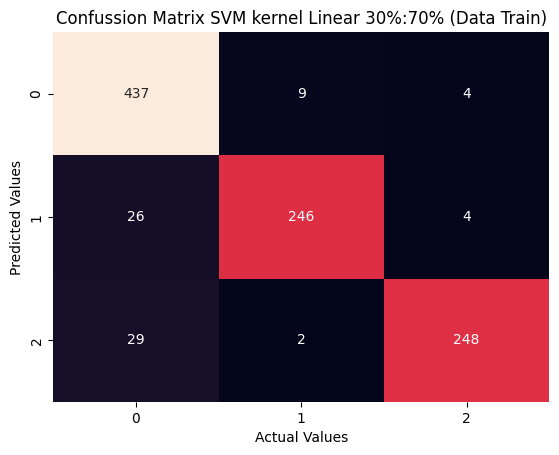

In [58]:
#Visualisasi dari Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(dpi=100)
mat = confusion_matrix(y_train, y_pred_train_svm)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.title('Confussion Matrix SVM kernel Linear 30%:70% (Data Train)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [59]:
#melihat banyak label confusion matrix
confusion_hasil = df_svm1['Confusion Matrix'].value_counts()
print("Confusion Matrix 3 Kelas:")
print(confusion_hasil)
print()

#melihat prediksi
count_hasil = df_svm1["Hasil"].value_counts()

benar = count_hasil["Benar"] if "Benar" in count_hasil.index else 0
salah = count_hasil["Salah"] if "Salah" in count_hasil.index else 0
print("Prediksi yang benar:", benar, "data")
print("Prediksi yang salah:", salah, "data")
print()

#melihat akurasi, presisi, dan recall
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#akurasi
acc = accuracy_score(y_train, y_pred_train_svm)
#tampilkan akurasi
print(f"Akurasi: {acc * 100:.2f}%")
print()

#presisi
average_precision = precision_score(y_train, y_pred_train_svm, average='weighted')
print(f"Presisi: {average_precision * 100:.2f}%")
print()

#recall
average_recall = recall_score(y_train, y_pred_train_svm, average='weighted')
print(f"Recall: {average_recall * 100:.2f}%")
print()

# F1-score
f1 = f1_score(y_train, y_pred_train_svm, average='weighted')
print(f"F1-score: {f1 * 100:.2f}%")
print()

Confusion Matrix 3 Kelas:
Confusion Matrix
True Negative (TN)                                               437
True Positive (TP)                                               248
True Netral (TNR)                                                246
False Positif (FP) untuk aktual Negatif tapi prediksi Positif     29
False Netral (FNR) untuk aktual Negatif tapi prediksi Netral      26
False Negatif (FN) untuk aktual Netral tapi prediksi Negatif       9
False Negatif (FN) untuk aktual Positif tapi prediksi Negatif      4
False Netral (FNR) untuk aktual Positif tapi prediksi Netral       4
False Positif (FP) untuk aktual Netral tapi prediksi Positif       2
Name: count, dtype: int64

Prediksi yang benar: 931 data
Prediksi yang salah: 74 data

Akurasi: 92.64%

Presisi: 92.98%

Recall: 92.64%

F1-score: 92.64%



# **Klasifikasi SVM Linear (Data Test)**

In [60]:
#masukan data
df_svm1 = pd.read_csv('data_klasifikasi_bromo.csv', encoding = 'utf-8')
pd.options.display.float_format = '{:.0f}'.format
df_svm1.head()

,Tweets,date tweets,Sentimen,Label,remove_user,cleaning,case_folding,tokenisasi,normalisasi,stopword_removal,stemming,to_sentence
0,@duniabulat5 @CNNIndonesia Nk musim kemarau pa...,2023-09-06 02:27:41+00:00,2,Netral,Nk musim kemarau panjang hampir hutan di jat...,musim kemarau panjang hampir hutan jatim keba...,musim kemarau panjang hampir hutan jatim keba...,"['musim', 'kemarau', 'panjang', 'hampir', 'hut...","['musim', 'kemarau', 'panjang', 'hampir', 'hut...","['musim', 'kemarau', 'hutan', 'jatim', 'kebaka...","['musim', 'kemarau', 'hutan', 'jatim', 'bakar'...",musim kemarau hutan jatim bakar tahun savana b...
1,Seng prewed sampek ngarai kebakaran nang bromo...,2023-09-06 15:35:33+00:00,1,Negatif,Seng prewed sampek ngarai kebakaran nang bromo...,Seng prewed sampek ngarai kebakaran nang bromo...,seng prewed sampek ngarai kebakaran nang bromo...,"['seng', 'prewed', 'sampek', 'ngarai', 'kebaka...","['seng', 'prewed', 'sampai', 'ngarai', 'kebaka...","['seng', 'prewed', 'ngarai', 'kebakaran', 'nan...","['seng', 'prewed', 'ngarai', 'bakar', 'nang', ...",seng prewed ngarai bakar nang bromo sumpah ake...
2,Kakeane kebakaran bromo wes dipadamke seminggu...,2023-09-06 17:26:36+00:00,1,Negatif,Kakeane kebakaran bromo wes dipadamke seminggu...,Kakeane kebakaran bromo wes dipadamke seminggu...,kakeane kebakaran bromo wes dipadamke seminggu...,"['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'bakar', 'bromo', 'wes', 'dipadamk...",kakeane bakar bromo wes dipadamke minggu iki a...
3,Kenapa kemping di Savana Bromo dilarang? Ya ka...,2023-09-06 20:18:58+00:00,1,Negatif,Kenapa kemping di Savana Bromo dilarang? Ya ka...,Kenapa kemping Savana Bromo dilarang karena in...,kenapa kemping savana bromo dilarang karena in...,"['kenapa', 'kemping', 'savana', 'bromo', 'dila...","['kenapa', 'kemping', 'savana', 'bromo', 'dila...","['kemping', 'savana', 'bromo', 'dilarang', 'ra...","['kemping', 'savana', 'bromo', 'larang', 'rawa...",kemping savana bromo larang rawan bakar jadi b...
4,@infomitigasi @RadioElshinta @KementerianLHK K...,2023-09-06 23:46:16+00:00,2,Netral,Kalau TNBTS keseluruhan berapa min ?? Kan B...,Kalau TNBTS keseluruhan berapa min Kan BROMO ...,kalau tnbts keseluruhan berapa min kan bromo ...,"['kalau', 'tnbts', 'keseluruhan', 'berapa', 'm...","['kalau', 'tnbts', 'keseluruhan', 'berapa', 'm...","['tnbts', 'min', 'bromo', 'tengger', 'semeru',...","['tnbts', 'min', 'bromo', 'tengger', 'meru', '...",tnbts min bromo tengger meru satu kelola tau k...


In [61]:
#Set sumbu nilai X dan Y
X = df_svm1['to_sentence']
y = df_svm1['Label']

**Data perbandingan 30%:70%**

In [62]:
# Membagi dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=431) #set random_state sejumlah data 30% dari data keseluruhan

In [63]:
print("Jumlah baris data latih (X_train):", len(X_train))
print("Jumlah baris data uji (X_test):", len(X_test))
print("Jumlah baris label latih (y_train):", len(y_train))
print("Jumlah baris label uji (y_test):", len(y_test))

Jumlah baris data latih (X_train): 1005
Jumlah baris data uji (X_test): 431
Jumlah baris label latih (y_train): 1005
Jumlah baris label uji (y_test): 431


In [64]:
#KLASIFIKASI SVM

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

#TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# buat data yang akan diklasifikasi naive bayes menjadi balance
from sklearn.utils import class_weight
sample = class_weight.compute_sample_weight('balanced', y_train)

# Klasifikasi SVM dengan Linear kernel
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train, sample_weight=sample)

# Prediksi sentimen pada data test dengan SVM
y_pred_svm = svm.predict(X_test_tfidf)

# Lihat clasification report
print("Classification Report untuk Data Test:")
print(classification_report(y_test, y_pred_svm))

Classification Report untuk Data Test:
              precision    recall  f1-score   support

     Negatif       0.62      0.64      0.63       201
      Netral       0.50      0.47      0.49       135
     Positif       0.50      0.51      0.50        95

    accuracy                           0.56       431
   macro avg       0.54      0.54      0.54       431
weighted avg       0.56      0.56      0.56       431



In [65]:
#Lihat Akurasi SVM
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_svm)
print("Akurasi Data Test:", accuracy)

Akurasi Data Test: 0.5591647331786543


In [66]:
len(X_test) #jumlah data test yg diuji/test di perbandingan ini

431

In [67]:
#Membuat Hasil dataframe dengan melihat hasil label prediksi, nilai sebenarnya, hasil, dan confusion matrix
df_svm2 = pd.DataFrame({"Text": X_test, "Prediksi": y_pred_svm, "Aktual": y_test})
df_svm2["Hasil"] = df_svm2.apply(lambda row: "Benar" if row["Aktual"] == row["Prediksi"] else "Salah", axis=1)

# Menambahkan kolom "Confusion Matrix" berdasarkan kondisi yang diberikan
def calculate_confusion_matrix(row):
    if row["Aktual"] == "Positif" and row["Prediksi"] == "Positif":
        return "True Positive (TP)"
    elif row["Aktual"] == "Negatif" and row["Prediksi"] == "Negatif":
        return "True Negative (TN)"
    elif row["Aktual"] == "Netral" and row["Prediksi"] == "Netral":
        return "True Netral (TNR)"
    elif row["Aktual"] == "Negatif" and row["Prediksi"] == "Positif":
        return "False Positif (FP) untuk aktual Negatif tapi prediksi Positif"
    elif row["Aktual"] == "Netral" and row["Prediksi"] == "Positif":
        return "False Positif (FP) untuk aktual Netral tapi prediksi Positif"
    elif row["Aktual"] == "Positif" and row["Prediksi"] == "Negatif":
        return "False Negatif (FN) untuk aktual Positif tapi prediksi Negatif"
    elif row["Aktual"] == "Netral" and row["Prediksi"] == "Negatif":
        return "False Negatif (FN) untuk aktual Netral tapi prediksi Negatif"
    elif row["Aktual"] == "Positif" and row["Prediksi"] == "Netral":
        return "False Netral (FNR) untuk aktual Positif tapi prediksi Netral"
    elif row["Aktual"] == "Negatif" and row["Prediksi"] == "Netral":
        return "False Netral (FNR) untuk aktual Negatif tapi prediksi Netral"
    else:
        return "Unknown"

df_svm2["Confusion Matrix"] = df_svm2.apply(calculate_confusion_matrix, axis=1)
df_svm2

,Text,Prediksi,Aktual,Hasil,Confusion Matrix
1214,pengin bromo bromonya bakar bagus,Positif,Netral,Salah,False Positif (FP) untuk aktual Netral tapi pr...
65,bakar gara gara prewed bromo ngalamin bakar ke...,Netral,Negatif,Salah,False Netral (FNR) untuk aktual Negatif tapi p...
229,bromo bakar mas david,Netral,Netral,Benar,True Netral (TNR)
259,simpan misuh misuh dengar kabar bromo bakar gu...,Netral,Positif,Salah,False Netral (FNR) untuk aktual Positif tapi p...
230,cek berita bakar bromo,Netral,Netral,Benar,True Netral (TNR)
...,...,...,...,...,...
681,maroko gempa libya banjir bandang bromo bakar ...,Netral,Negatif,Salah,False Netral (FNR) untuk aktual Negatif tapi p...
795,mending uang prepare nikah pakai bayar ganti r...,Negatif,Positif,Salah,False Negatif (FN) untuk aktual Positif tapi p...
314,kemarin bakar savana hutan mncapai bromo probo...,Netral,Positif,Salah,False Netral (FNR) untuk aktual Positif tapi p...
160,khutbah jumat hukum foto pre wedding perspekti...,Positif,Netral,Salah,False Positif (FP) untuk aktual Netral tapi pr...


In [68]:
#save hasil dataframe diatas
df_svm2.to_csv('hasil_klasifikasi_svm-linear-bromo-30%-70%-data-test.csv', sep=',', index=False)

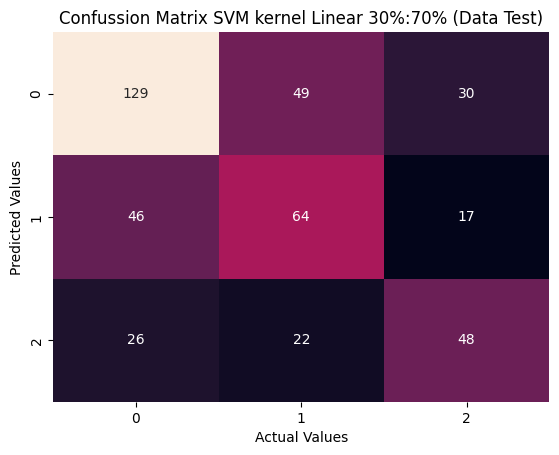

In [69]:
#Visualisasi dari Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(dpi=100)
mat = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.title('Confussion Matrix SVM kernel Linear 30%:70% (Data Test)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Confusion Matrix 3 Kelas:
Confusion Matrix
True Negative (TN)                                               129
True Netral (TNR)                                                 64
False Negatif (FN) untuk aktual Netral tapi prediksi Negatif      49
True Positive (TP)                                                48
False Netral (FNR) untuk aktual Negatif tapi prediksi Netral      46
False Negatif (FN) untuk aktual Positif tapi prediksi Negatif     30
False Positif (FP) untuk aktual Negatif tapi prediksi Positif     26
False Positif (FP) untuk aktual Netral tapi prediksi Positif      22
False Netral (FNR) untuk aktual Positif tapi prediksi Netral      17
Name: count, dtype: int64

Prediksi yang benar: 241 data
Prediksi yang salah: 190 data

Akurasi: 55.92%

Presisi: 55.73%

Recall: 55.92%

F1-score: 92.64%

Classification Report untuk Data Test:
              precision    recall  f1-score   support

     Negatif       0.62      0.64      0.63       201
      Netral       0.50      0.4

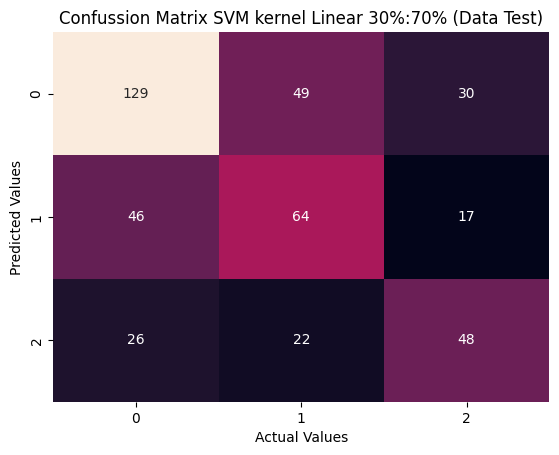

In [70]:
#melihat banyak label confusion matrix
confusion_hasil = df_svm2['Confusion Matrix'].value_counts()
print("Confusion Matrix 3 Kelas:")
print(confusion_hasil)
print()

#melihat prediksi
count_hasil = df_svm2["Hasil"].value_counts()

benar = count_hasil["Benar"] if "Benar" in count_hasil.index else 0
salah = count_hasil["Salah"] if "Salah" in count_hasil.index else 0
print("Prediksi yang benar:", benar, "data")
print("Prediksi yang salah:", salah, "data")
print()

#melihat akurasi, presisi, dan recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

#akurasi
acc = accuracy_score(y_test, y_pred_svm)
#tampilkan akurasi
print(f"Akurasi: {acc * 100:.2f}%")
print()

#presisi
average_precision = precision_score(y_test, y_pred_svm, average='weighted')
print(f"Presisi: {average_precision * 100:.2f}%")
print()

#recall
average_recall = recall_score(y_test, y_pred_svm, average='weighted')
print(f"Recall: {average_recall * 100:.2f}%")
print()

# F1-score
f1 = f1_score(y_train, y_pred_train_svm, average='weighted')
print(f"F1-score: {f1 * 100:.2f}%")
print()

#KLASIFIKASI SVM

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

#TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# buat data yang akan diklasifikasi naive bayes menjadi balance
from sklearn.utils import class_weight
sample = class_weight.compute_sample_weight('balanced', y_train)

# Klasifikasi SVM dengan Linear kernel
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train, sample_weight=sample)

# Prediksi sentimen pada data test dengan SVM
y_pred_svm = svm.predict(X_test_tfidf)

# Lihat clasification report
print("Classification Report untuk Data Test:")
print(classification_report(y_test, y_pred_svm))

#Visualisasi dari Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(dpi=100)
mat = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.title('Confussion Matrix SVM kernel Linear 30%:70% (Data Test)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

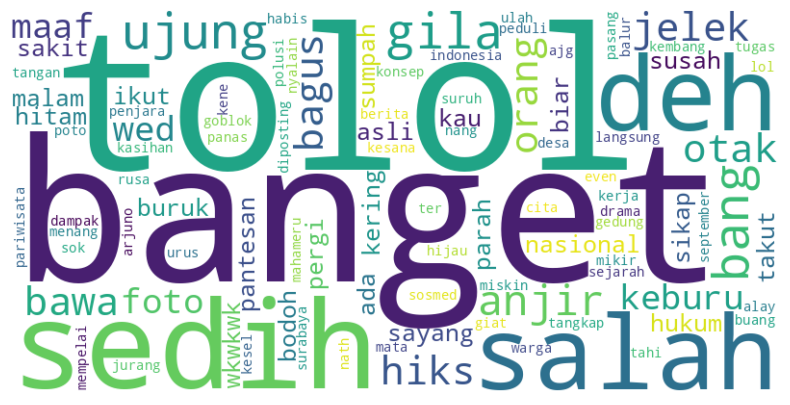

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Mendapatkan kata-kata yang paling signifikan dari SVM
coef = svm.coef_.toarray()[0]
feature_names = vectorizer.get_feature_names_out()
top_words_indices = coef.argsort()[-100:][::-1]  # Ambil 20 kata dengan koefisien terbesar
top_words = [feature_names[i] for i in top_words_indices]

# Visualisasi dengan Wordcloud
wordcloud_text = ' '.join(top_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# **Klasifikasi Naive Bayes - Data Train**

In [72]:
#masukan data
df_nb1 = pd.read_csv('data_klasifikasi_bromo.csv', encoding = 'utf-8')
pd.options.display.float_format = '{:.0f}'.format
df_nb1.head()

,Tweets,date tweets,Sentimen,Label,remove_user,cleaning,case_folding,tokenisasi,normalisasi,stopword_removal,stemming,to_sentence
0,@duniabulat5 @CNNIndonesia Nk musim kemarau pa...,2023-09-06 02:27:41+00:00,2,Netral,Nk musim kemarau panjang hampir hutan di jat...,musim kemarau panjang hampir hutan jatim keba...,musim kemarau panjang hampir hutan jatim keba...,"['musim', 'kemarau', 'panjang', 'hampir', 'hut...","['musim', 'kemarau', 'panjang', 'hampir', 'hut...","['musim', 'kemarau', 'hutan', 'jatim', 'kebaka...","['musim', 'kemarau', 'hutan', 'jatim', 'bakar'...",musim kemarau hutan jatim bakar tahun savana b...
1,Seng prewed sampek ngarai kebakaran nang bromo...,2023-09-06 15:35:33+00:00,1,Negatif,Seng prewed sampek ngarai kebakaran nang bromo...,Seng prewed sampek ngarai kebakaran nang bromo...,seng prewed sampek ngarai kebakaran nang bromo...,"['seng', 'prewed', 'sampek', 'ngarai', 'kebaka...","['seng', 'prewed', 'sampai', 'ngarai', 'kebaka...","['seng', 'prewed', 'ngarai', 'kebakaran', 'nan...","['seng', 'prewed', 'ngarai', 'bakar', 'nang', ...",seng prewed ngarai bakar nang bromo sumpah ake...
2,Kakeane kebakaran bromo wes dipadamke seminggu...,2023-09-06 17:26:36+00:00,1,Negatif,Kakeane kebakaran bromo wes dipadamke seminggu...,Kakeane kebakaran bromo wes dipadamke seminggu...,kakeane kebakaran bromo wes dipadamke seminggu...,"['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'bakar', 'bromo', 'wes', 'dipadamk...",kakeane bakar bromo wes dipadamke minggu iki a...
3,Kenapa kemping di Savana Bromo dilarang? Ya ka...,2023-09-06 20:18:58+00:00,1,Negatif,Kenapa kemping di Savana Bromo dilarang? Ya ka...,Kenapa kemping Savana Bromo dilarang karena in...,kenapa kemping savana bromo dilarang karena in...,"['kenapa', 'kemping', 'savana', 'bromo', 'dila...","['kenapa', 'kemping', 'savana', 'bromo', 'dila...","['kemping', 'savana', 'bromo', 'dilarang', 'ra...","['kemping', 'savana', 'bromo', 'larang', 'rawa...",kemping savana bromo larang rawan bakar jadi b...
4,@infomitigasi @RadioElshinta @KementerianLHK K...,2023-09-06 23:46:16+00:00,2,Netral,Kalau TNBTS keseluruhan berapa min ?? Kan B...,Kalau TNBTS keseluruhan berapa min Kan BROMO ...,kalau tnbts keseluruhan berapa min kan bromo ...,"['kalau', 'tnbts', 'keseluruhan', 'berapa', 'm...","['kalau', 'tnbts', 'keseluruhan', 'berapa', 'm...","['tnbts', 'min', 'bromo', 'tengger', 'semeru',...","['tnbts', 'min', 'bromo', 'tengger', 'meru', '...",tnbts min bromo tengger meru satu kelola tau k...


In [73]:
#Set sumbu nilai X dan Y
X = df_nb1['to_sentence']
y = df_nb1['Label']

**Data perbandingan 30%:70%**

In [74]:
# Membagi dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=431) #set random_state sejumlah data 30% dari data keseluruhan

In [75]:
#KLASIFIKASI NAIVE BAYES

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Membangun model tf-idf
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# buat data yang akan diklasifikasi naive bayes menjadi balance
from sklearn.utils import class_weight
sample = class_weight.compute_sample_weight('balanced', y_train)

# Melatih model Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train, sample_weight=sample)

# Memprediksi sentimen pada data uji
y_pred_train_nb = nb_classifier.predict(X_train_tfidf)

# Melihat classification report
print("Classification Report untuk Data Train:")
print(classification_report(y_train, y_pred_train_nb))

Classification Report untuk Data Train:
              precision    recall  f1-score   support

     Negatif       0.96      0.88      0.92       492
      Netral       0.88      0.94      0.91       257
     Positif       0.87      0.95      0.91       256

    accuracy                           0.91      1005
   macro avg       0.90      0.92      0.91      1005
weighted avg       0.92      0.91      0.91      1005



In [76]:
#Lihat Akurasi NB
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, y_pred_train_nb)
print("Akurasi Data Train:", accuracy)

Akurasi Data Train: 0.9144278606965174


In [77]:
len(X_train) #jumlah data train yang diuji diperbandingan ini

1005

In [78]:
# Create DataFrame for Naive Bayes
df_nb1 = pd.DataFrame({"Text": X_train, "Prediksi": y_pred_train_nb, "Aktual": y_train})
df_nb1["Hasil"] = df_nb1.apply(lambda row: "Benar" if row["Aktual"] == row["Prediksi"] else "Salah", axis=1)

# Define confusion matrix conditions for Naive Bayes
def calculate_confusion_matrix_nb(row):
    if row["Aktual"] == "Positif" and row["Prediksi"] == "Positif":
        return "True Positive (TP)"
    elif row["Aktual"] == "Negatif" and row["Prediksi"] == "Negatif":
        return "True Negative (TN)"
    elif row["Aktual"] == "Netral" and row["Prediksi"] == "Netral":
        return "True Netral (TNR)"
    elif row["Aktual"] == "Negatif" and row["Prediksi"] == "Positif":
        return "False Positif (FP) untuk aktual Negatif tapi prediksi Positif"
    elif row["Aktual"] == "Netral" and row["Prediksi"] == "Positif":
        return "False Positif (FP) untuk aktual Netral tapi prediksi Positif"
    elif row["Aktual"] == "Positif" and row["Prediksi"] == "Negatif":
        return "False Negatif (FN) untuk aktual Positif tapi prediksi Negatif"
    elif row["Aktual"] == "Netral" and row["Prediksi"] == "Negatif":
        return "False Negatif (FN) untuk aktual Netral tapi prediksi Negatif"
    elif row["Aktual"] == "Positif" and row["Prediksi"] == "Netral":
        return "False Netral (FNR) untuk aktual Positif tapi prediksi Netral"
    elif row["Aktual"] == "Negatif" and row["Prediksi"] == "Netral":
        return "False Netral (FNR) untuk aktual Negatif tapi prediksi Netral"
    else:
        return "Unknown"

# Apply confusion matrix calculation to the DataFrame
df_nb1["Confusion Matrix"] = df_nb1.apply(calculate_confusion_matrix_nb, axis=1)

# Display the DataFrame for Naive Bayes
df_nb1

,Text,Prediksi,Aktual,Hasil,Confusion Matrix
936,orang bodoh sebab bakar kawasan bromo baca ber...,Negatif,Negatif,Benar,True Negative (TN)
567,bromo bakar,Netral,Negatif,Salah,False Netral (FNR) untuk aktual Negatif tapi p...
633,catin foto prewed pakai flare nyebabin area br...,Netral,Positif,Salah,False Netral (FNR) untuk aktual Positif tapi p...
335,dukung upaya pulih ekosistem bromo bakar,Positif,Positif,Benar,True Positive (TP)
1009,apar usaha mandam api salah flare sana sebab b...,Positif,Positif,Benar,True Positive (TP)
...,...,...,...,...,...
605,bakar agustus kelola taman nasional kali buka ...,Positif,Positif,Benar,True Positive (TP)
159,orang bikin bakar bromo becanda lanjut rencana...,Negatif,Negatif,Benar,True Negative (TN)
247,bakar landa padang savana area bukit teletubbi...,Netral,Netral,Benar,True Netral (TNR)
406,oknum pemyebab bakar bukit teletubbies bromo t...,Negatif,Negatif,Benar,True Negative (TN)


In [79]:
#save hasil dataframe diatas
df_nb1.to_csv('hasil_klasifikasi_nb-bromo-30%-70%-data-train.csv', sep=',', index=False)

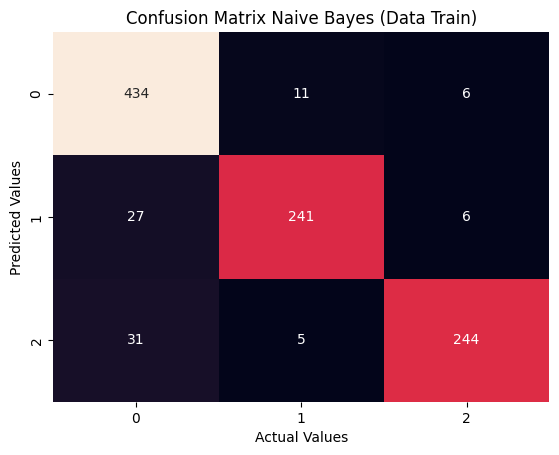

In [80]:
#Visualisasi dari Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(dpi=100)
mat_nb = confusion_matrix(y_train, y_pred_train_nb)
sns.heatmap(mat_nb.T, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix Naive Bayes (Data Train)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [81]:
#melihat banyak label confusion matrix
# Melihat banyak label confusion matrix (Naive Bayes)
confusion_hasil_nb = df_nb1['Confusion Matrix'].value_counts()
print("Confusion Matrix 3 Kelas (Naive Bayes):")
print(confusion_hasil_nb)
print()

# Melihat prediksi (Naive Bayes)
count_hasil_nb = df_nb1["Hasil"].value_counts()

benar_nb = count_hasil_nb["Benar"] if "Benar" in count_hasil_nb.index else 0
salah_nb = count_hasil_nb["Salah"] if "Salah" in count_hasil_nb.index else 0
print("Prediksi yang benar (Naive Bayes):", benar_nb, "data")
print("Prediksi yang salah (Naive Bayes):", salah_nb, "data")
print()

# Melihat akurasi, presisi, dan recall (Naive Bayes)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Akurasi (Naive Bayes)
acc_nb = accuracy_score(y_train, y_pred_train_nb)
# Tampilkan akurasi (Naive Bayes)
print(f"Akurasi (Naive Bayes): {acc_nb * 100:.2f}%")
print()

# Presisi (Naive Bayes)
average_precision_nb = precision_score(y_train, y_pred_train_nb, average='weighted')
print(f"Presisi (Naive Bayes): {average_precision_nb * 100:.2f}%")
print()

# Recall (Naive Bayes)
average_recall_nb = recall_score(y_train, y_pred_train_nb, average='weighted')
print(f"Recall (Naive Bayes): {average_recall_nb * 100:.2f}%")
print()

# F1-score
f1 = f1_score(y_train, y_pred_train_nb, average='weighted')
print(f"F1-score: {f1 * 100:.2f}%")
print()

Confusion Matrix 3 Kelas (Naive Bayes):
Confusion Matrix
True Negative (TN)                                               434
True Positive (TP)                                               244
True Netral (TNR)                                                241
False Positif (FP) untuk aktual Negatif tapi prediksi Positif     31
False Netral (FNR) untuk aktual Negatif tapi prediksi Netral      27
False Negatif (FN) untuk aktual Netral tapi prediksi Negatif      11
False Netral (FNR) untuk aktual Positif tapi prediksi Netral       6
False Negatif (FN) untuk aktual Positif tapi prediksi Negatif      6
False Positif (FP) untuk aktual Netral tapi prediksi Positif       5
Name: count, dtype: int64

Prediksi yang benar (Naive Bayes): 919 data
Prediksi yang salah (Naive Bayes): 86 data

Akurasi (Naive Bayes): 91.44%

Presisi (Naive Bayes): 91.80%

Recall (Naive Bayes): 91.44%

F1-score: 91.47%



# **Klasifikasi Naive Bayes - Data Test**

In [82]:
#masukan data
df_nb2 = pd.read_csv('data_klasifikasi_bromo.csv', encoding = 'utf-8')
pd.options.display.float_format = '{:.0f}'.format
df_nb2.head()

,Tweets,date tweets,Sentimen,Label,remove_user,cleaning,case_folding,tokenisasi,normalisasi,stopword_removal,stemming,to_sentence
0,@duniabulat5 @CNNIndonesia Nk musim kemarau pa...,2023-09-06 02:27:41+00:00,2,Netral,Nk musim kemarau panjang hampir hutan di jat...,musim kemarau panjang hampir hutan jatim keba...,musim kemarau panjang hampir hutan jatim keba...,"['musim', 'kemarau', 'panjang', 'hampir', 'hut...","['musim', 'kemarau', 'panjang', 'hampir', 'hut...","['musim', 'kemarau', 'hutan', 'jatim', 'kebaka...","['musim', 'kemarau', 'hutan', 'jatim', 'bakar'...",musim kemarau hutan jatim bakar tahun savana b...
1,Seng prewed sampek ngarai kebakaran nang bromo...,2023-09-06 15:35:33+00:00,1,Negatif,Seng prewed sampek ngarai kebakaran nang bromo...,Seng prewed sampek ngarai kebakaran nang bromo...,seng prewed sampek ngarai kebakaran nang bromo...,"['seng', 'prewed', 'sampek', 'ngarai', 'kebaka...","['seng', 'prewed', 'sampai', 'ngarai', 'kebaka...","['seng', 'prewed', 'ngarai', 'kebakaran', 'nan...","['seng', 'prewed', 'ngarai', 'bakar', 'nang', ...",seng prewed ngarai bakar nang bromo sumpah ake...
2,Kakeane kebakaran bromo wes dipadamke seminggu...,2023-09-06 17:26:36+00:00,1,Negatif,Kakeane kebakaran bromo wes dipadamke seminggu...,Kakeane kebakaran bromo wes dipadamke seminggu...,kakeane kebakaran bromo wes dipadamke seminggu...,"['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'bakar', 'bromo', 'wes', 'dipadamk...",kakeane bakar bromo wes dipadamke minggu iki a...
3,Kenapa kemping di Savana Bromo dilarang? Ya ka...,2023-09-06 20:18:58+00:00,1,Negatif,Kenapa kemping di Savana Bromo dilarang? Ya ka...,Kenapa kemping Savana Bromo dilarang karena in...,kenapa kemping savana bromo dilarang karena in...,"['kenapa', 'kemping', 'savana', 'bromo', 'dila...","['kenapa', 'kemping', 'savana', 'bromo', 'dila...","['kemping', 'savana', 'bromo', 'dilarang', 'ra...","['kemping', 'savana', 'bromo', 'larang', 'rawa...",kemping savana bromo larang rawan bakar jadi b...
4,@infomitigasi @RadioElshinta @KementerianLHK K...,2023-09-06 23:46:16+00:00,2,Netral,Kalau TNBTS keseluruhan berapa min ?? Kan B...,Kalau TNBTS keseluruhan berapa min Kan BROMO ...,kalau tnbts keseluruhan berapa min kan bromo ...,"['kalau', 'tnbts', 'keseluruhan', 'berapa', 'm...","['kalau', 'tnbts', 'keseluruhan', 'berapa', 'm...","['tnbts', 'min', 'bromo', 'tengger', 'semeru',...","['tnbts', 'min', 'bromo', 'tengger', 'meru', '...",tnbts min bromo tengger meru satu kelola tau k...


In [83]:
#Set sumbu nilai X dan Y
X = df_nb2['to_sentence']
y = df_nb2['Label']

**Data perbandingan 30%:70%**

In [84]:
# Membagi dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=431) #set random_state sejumlah data 30% dari data keseluruhan

In [85]:
print("Jumlah baris data latih (X_train):", len(X_train))
print("Jumlah baris data uji (X_test):", len(X_test))
print("Jumlah baris label latih (y_train):", len(y_train))
print("Jumlah baris label uji (y_test):", len(y_test))

Jumlah baris data latih (X_train): 1005
Jumlah baris data uji (X_test): 431
Jumlah baris label latih (y_train): 1005
Jumlah baris label uji (y_test): 431


In [86]:
#KLASIFIKASI NAIVE BAYES

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Membangun model tf-idf
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# buat data yang akan diklasifikasi naive bayes menjadi balance
from sklearn.utils import class_weight
sample = class_weight.compute_sample_weight('balanced', y_train)

# Melatih model Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train, sample_weight=sample)

# Memprediksi sentimen pada data uji
y_pred_nb = nb_classifier.predict(X_test_tfidf)

# Melihat classification report
print("Classification Report untuk Data Test:")
print(classification_report(y_test, y_pred_nb))

Classification Report untuk Data Test:
              precision    recall  f1-score   support

     Negatif       0.65      0.68      0.67       201
      Netral       0.58      0.49      0.53       135
     Positif       0.53      0.59      0.56        95

    accuracy                           0.60       431
   macro avg       0.59      0.59      0.58       431
weighted avg       0.60      0.60      0.60       431



In [87]:
#Lihat Akurasi NB
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_nb)
print("Akurasi Data Test:", accuracy)

Akurasi Data Test: 0.6009280742459396


In [88]:
len(X_test) #jumlah data test yg diuji/test di perbandingan ini

431

In [89]:
#Membuat Hasil dataframe dengan melihat hasil label prediksi, nilai sebenarnya, hasil, dan confusion matrix
# Membuat DataFrame untuk Naive Bayes
df_nb2 = pd.DataFrame({"Text": X_test, "Prediksi": y_pred_nb, "Aktual": y_test})
df_nb2["Hasil"] = df_nb2.apply(lambda row: "Benar" if row["Aktual"] == row["Prediksi"] else "Salah", axis=1)

# Menambahkan kolom "Confusion Matrix" berdasarkan kondisi yang diberikan untuk Naive Bayes
def calculate_confusion_matrix_nb(row):
    if row["Aktual"] == "Positif" and row["Prediksi"] == "Positif":
        return "True Positive (TP)"
    elif row["Aktual"] == "Negatif" and row["Prediksi"] == "Negatif":
        return "True Negative (TN)"
    elif row["Aktual"] == "Netral" and row["Prediksi"] == "Netral":
        return "True Netral (TNR)"
    elif row["Aktual"] == "Negatif" and row["Prediksi"] == "Positif":
        return "False Positif (FP) untuk aktual Negatif tapi prediksi Positif"
    elif row["Aktual"] == "Netral" and row["Prediksi"] == "Positif":
        return "False Positif (FP) untuk aktual Netral tapi prediksi Positif"
    elif row["Aktual"] == "Positif" and row["Prediksi"] == "Negatif":
        return "False Negatif (FN) untuk aktual Positif tapi prediksi Negatif"
    elif row["Aktual"] == "Netral" and row["Prediksi"] == "Negatif":
        return "False Negatif (FN) untuk aktual Netral tapi prediksi Negatif"
    elif row["Aktual"] == "Positif" and row["Prediksi"] == "Netral":
        return "False Netral (FNR) untuk aktual Positif tapi prediksi Netral"
    elif row["Aktual"] == "Negatif" and row["Prediksi"] == "Netral":
        return "False Netral (FNR) untuk aktual Negatif tapi prediksi Netral"
    else:
        return "Unknown"

df_nb2["Confusion Matrix"] = df_nb2.apply(calculate_confusion_matrix_nb, axis=1)
df_nb2

,Text,Prediksi,Aktual,Hasil,Confusion Matrix
1214,pengin bromo bromonya bakar bagus,Negatif,Netral,Salah,False Negatif (FN) untuk aktual Netral tapi pr...
65,bakar gara gara prewed bromo ngalamin bakar ke...,Netral,Negatif,Salah,False Netral (FNR) untuk aktual Negatif tapi p...
229,bromo bakar mas david,Netral,Netral,Benar,True Netral (TNR)
259,simpan misuh misuh dengar kabar bromo bakar gu...,Negatif,Positif,Salah,False Negatif (FN) untuk aktual Positif tapi p...
230,cek berita bakar bromo,Netral,Netral,Benar,True Netral (TNR)
...,...,...,...,...,...
681,maroko gempa libya banjir bandang bromo bakar ...,Netral,Negatif,Salah,False Netral (FNR) untuk aktual Negatif tapi p...
795,mending uang prepare nikah pakai bayar ganti r...,Negatif,Positif,Salah,False Negatif (FN) untuk aktual Positif tapi p...
314,kemarin bakar savana hutan mncapai bromo probo...,Negatif,Positif,Salah,False Negatif (FN) untuk aktual Positif tapi p...
160,khutbah jumat hukum foto pre wedding perspekti...,Positif,Netral,Salah,False Positif (FP) untuk aktual Netral tapi pr...


In [90]:
#save hasil dataframe diatas
df_nb2.to_csv('hasil_klasifikasi_nb-bromo-30%-70%-data-test.csv', sep=',', index=False)

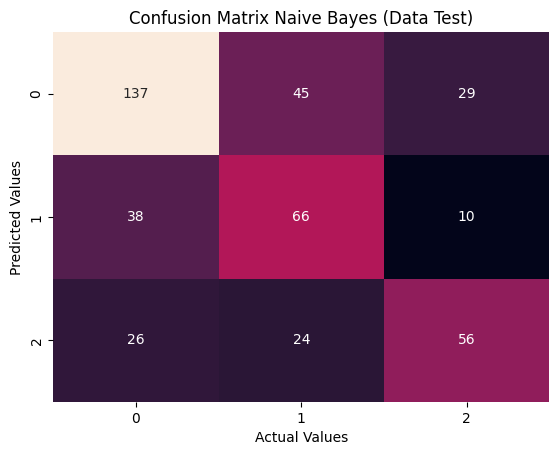

In [91]:
#Visualisasi dari Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(dpi=100)
mat_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(mat_nb.T, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix Naive Bayes (Data Test)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Confusion Matrix 3 Kelas (Naive Bayes):
Confusion Matrix
True Negative (TN)                                               137
True Netral (TNR)                                                 66
True Positive (TP)                                                56
False Negatif (FN) untuk aktual Netral tapi prediksi Negatif      45
False Netral (FNR) untuk aktual Negatif tapi prediksi Netral      38
False Negatif (FN) untuk aktual Positif tapi prediksi Negatif     29
False Positif (FP) untuk aktual Negatif tapi prediksi Positif     26
False Positif (FP) untuk aktual Netral tapi prediksi Positif      24
False Netral (FNR) untuk aktual Positif tapi prediksi Netral      10
Name: count, dtype: int64

Prediksi yang benar (Naive Bayes): 259 data
Prediksi yang salah (Naive Bayes): 172 data

Akurasi (Naive Bayes): 60.09%

Presisi (Naive Bayes): 60.06%

Recall (Naive Bayes): 60.09%

F1-score: 91.47%

Classification Report untuk Data Test:
              precision    recall  f1-score   support

  

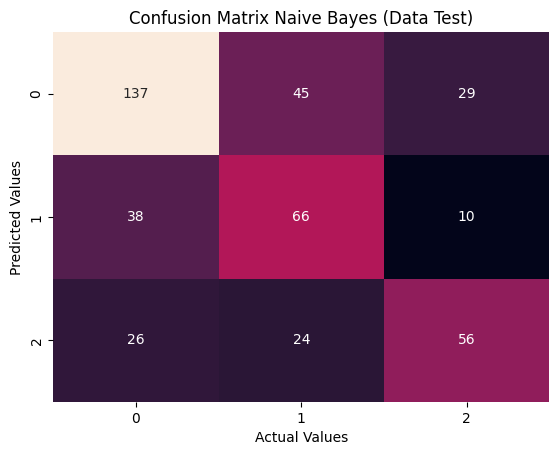

In [92]:
#melihat banyak label confusion matrix
# Melihat banyak label confusion matrix (Naive Bayes)
confusion_hasil_nb = df_nb2['Confusion Matrix'].value_counts()
print("Confusion Matrix 3 Kelas (Naive Bayes):")
print(confusion_hasil_nb)
print()

# Melihat prediksi (Naive Bayes)
count_hasil_nb = df_nb2["Hasil"].value_counts()

benar_nb = count_hasil_nb["Benar"] if "Benar" in count_hasil_nb.index else 0
salah_nb = count_hasil_nb["Salah"] if "Salah" in count_hasil_nb.index else 0
print("Prediksi yang benar (Naive Bayes):", benar_nb, "data")
print("Prediksi yang salah (Naive Bayes):", salah_nb, "data")
print()

# Melihat akurasi, presisi, dan recall (Naive Bayes)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Akurasi (Naive Bayes)
acc_nb = accuracy_score(y_test, y_pred_nb)
# Tampilkan akurasi (Naive Bayes)
print(f"Akurasi (Naive Bayes): {acc_nb * 100:.2f}%")
print()

# Presisi (Naive Bayes)
average_precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
print(f"Presisi (Naive Bayes): {average_precision_nb * 100:.2f}%")
print()

# Recall (Naive Bayes)
average_recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
print(f"Recall (Naive Bayes): {average_recall_nb * 100:.2f}%")
print()

# F1-score
f1 = f1_score(y_train, y_pred_train_nb, average='weighted')
print(f"F1-score: {f1 * 100:.2f}%")
print()

#KLASIFIKASI NAIVE BAYES

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Membangun model tf-idf
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# buat data yang akan diklasifikasi naive bayes menjadi balance
from sklearn.utils import class_weight
sample = class_weight.compute_sample_weight('balanced', y_train)

# Melatih model Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train, sample_weight=sample)

# Memprediksi sentimen pada data uji
y_pred_nb = nb_classifier.predict(X_test_tfidf)

# Melihat classification report
print("Classification Report untuk Data Test:")
print(classification_report(y_test, y_pred_nb))

#Visualisasi dari Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(dpi=100)
mat_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(mat_nb.T, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix Naive Bayes (Data Test)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

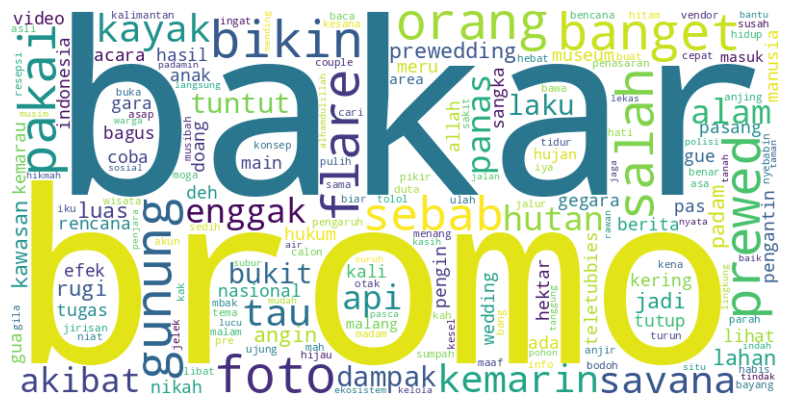

In [93]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Mendapatkan probabilitas kata-kata dari model Naive Bayes
word_probabilities = nb_classifier.feature_log_prob_

# Kata-kata dengan probabilitas tertinggi untuk setiap kelas
top_words_indices = word_probabilities.argsort(axis=1)[:, :-100:-1]  # Ambil 20 kata dengan probabilitas tertinggi
feature_names = vectorizer.get_feature_names_out()
top_words = [feature_names[i] for i in top_words_indices.flatten()]

# Visualisasi dengan Wordcloud
wordcloud_text = ' '.join(top_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# **Wordcloud Lengkap**

Import modul yang dibutuhkan. Disini pandas berfungsi untuk memanipulasi data dalam bentuk tabel (dataframe). matplotlib berguna untuk visualisai wordcloud nanti. Worcloud digunakan untuk membuat wordcloud. dan Counter digunakan untuk menghitung nilai frekuensi katanya nanti.

In [94]:
#import modul
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

Memanggil data yang akan diproses. Disini memakai data hasil dari tahap labelin sebelumnya.

In [95]:
#panggil data
df = pd.read_csv('dataset_labelling_data-bromo-1.csv')
pd.options.display.float_format = '{:.0f}'.format
df.head(10)

,Tweets,date tweets,Sentimen,Label,remove_user,cleaning,case_folding,tokenisasi,normalisasi,stopword_removal,stemming,to_sentence
0,@duniabulat5 @CNNIndonesia Nk musim kemarau pa...,2023-09-06 02:27:41+00:00,2,Netral,Nk musim kemarau panjang hampir hutan di jat...,musim kemarau panjang hampir hutan jatim keba...,musim kemarau panjang hampir hutan jatim keba...,"['musim', 'kemarau', 'panjang', 'hampir', 'hut...","['musim', 'kemarau', 'panjang', 'hampir', 'hut...","['musim', 'kemarau', 'hutan', 'jatim', 'kebaka...","['musim', 'kemarau', 'hutan', 'jatim', 'bakar'...",musim kemarau hutan jatim bakar tahun savana b...
1,Seng prewed sampek ngarai kebakaran nang bromo...,2023-09-06 15:35:33+00:00,1,Negatif,Seng prewed sampek ngarai kebakaran nang bromo...,Seng prewed sampek ngarai kebakaran nang bromo...,seng prewed sampek ngarai kebakaran nang bromo...,"['seng', 'prewed', 'sampek', 'ngarai', 'kebaka...","['seng', 'prewed', 'sampai', 'ngarai', 'kebaka...","['seng', 'prewed', 'ngarai', 'kebakaran', 'nan...","['seng', 'prewed', 'ngarai', 'bakar', 'nang', ...",seng prewed ngarai bakar nang bromo sumpah ake...
2,Kakeane kebakaran bromo wes dipadamke seminggu...,2023-09-06 17:26:36+00:00,1,Negatif,Kakeane kebakaran bromo wes dipadamke seminggu...,Kakeane kebakaran bromo wes dipadamke seminggu...,kakeane kebakaran bromo wes dipadamke seminggu...,"['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'kebakaran', 'bromo', 'wes', 'dipa...","['kakeane', 'bakar', 'bromo', 'wes', 'dipadamk...",kakeane bakar bromo wes dipadamke minggu iki a...
3,Kenapa kemping di Savana Bromo dilarang? Ya ka...,2023-09-06 20:18:58+00:00,1,Negatif,Kenapa kemping di Savana Bromo dilarang? Ya ka...,Kenapa kemping Savana Bromo dilarang karena in...,kenapa kemping savana bromo dilarang karena in...,"['kenapa', 'kemping', 'savana', 'bromo', 'dila...","['kenapa', 'kemping', 'savana', 'bromo', 'dila...","['kemping', 'savana', 'bromo', 'dilarang', 'ra...","['kemping', 'savana', 'bromo', 'larang', 'rawa...",kemping savana bromo larang rawan bakar jadi b...
4,@infomitigasi @RadioElshinta @KementerianLHK K...,2023-09-06 23:46:16+00:00,2,Netral,Kalau TNBTS keseluruhan berapa min ?? Kan B...,Kalau TNBTS keseluruhan berapa min Kan BROMO ...,kalau tnbts keseluruhan berapa min kan bromo ...,"['kalau', 'tnbts', 'keseluruhan', 'berapa', 'm...","['kalau', 'tnbts', 'keseluruhan', 'berapa', 'm...","['tnbts', 'min', 'bromo', 'tengger', 'semeru',...","['tnbts', 'min', 'bromo', 'tengger', 'meru', '...",tnbts min bromo tengger meru satu kelola tau k...
5,"Yg bikin bromo kebakaran jahat banget, padahal...",2023-09-07 14:01:35+00:00,1,Negatif,"Yg bikin bromo kebakaran jahat banget, padahal...",bikin bromo kebakaran jahat banget padahal du...,bikin bromo kebakaran jahat banget padahal du...,"['bikin', 'bromo', 'kebakaran', 'jahat', 'bang...","['bikin', 'bromo', 'kebakaran', 'jahat', 'bang...","['bikin', 'bromo', 'kebakaran', 'jahat', 'bang...","['bikin', 'bromo', 'bakar', 'jahat', 'banget',...",bikin bromo bakar jahat banget indah sedih ban...
6,Upaya pemadaman masih dilakukan hingga Kamis s...,2023-09-07 14:02:22+00:00,3,Positif,Upaya pemadaman masih dilakukan hingga Kamis s...,Upaya pemadaman masih dilakukan hingga Kamis s...,upaya pemadaman masih dilakukan hingga kamis s...,"['upaya', 'pemadaman', 'masih', 'dilakukan', '...","['upaya', 'pemadaman', 'masih', 'dilakukan', '...","['upaya', 'pemadaman', 'kamis', 'siang', 'lapo...","['upaya', 'madam', 'kamis', 'siang', 'lapor', ...",upaya madam kamis siang lapor korban bakar seb...
7,"setelah bikin kebakaran bromo, masih diposting...",2023-09-07 14:04:03+00:00,1,Negatif,"setelah bikin kebakaran bromo, masih diposting...",setelah bikin kebakaran bromo masih diposting ...,setelah bikin kebakaran bromo masih diposting ...,"['setelah', 'bikin', 'kebakaran', 'bromo', 'ma...","['setelah', 'bikin', 'kebakaran', 'bromo', 'ma...","['bikin', 'kebakaran', 'bromo', 'diposting']","['bikin', 'ba

**Melihat Banyak Data Per Sentimen**

In [96]:
df['Label'].value_counts()

Label
Negatif    693
Netral     392
Positif    352
Name: count, dtype: int64

**Dalam Diagram**

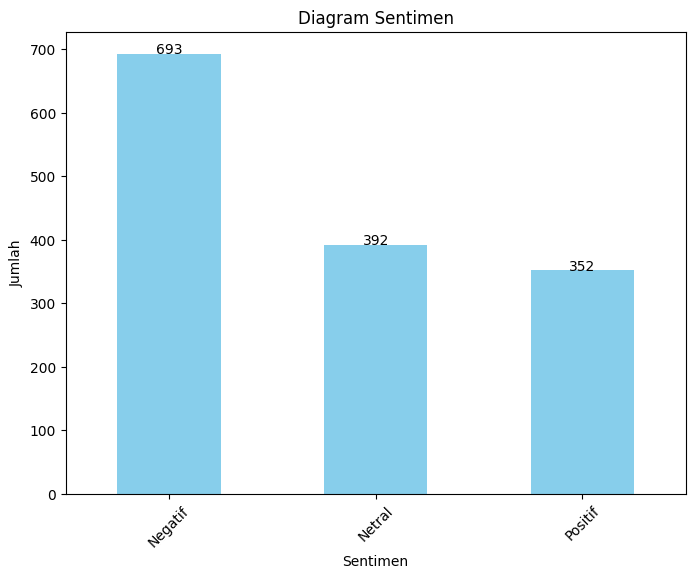

In [97]:
sentimen_counts = df['Label'].value_counts()

#Membuat diagram batang
plt.figure(figsize=(8, 6))
sentimen_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Diagram Sentimen')
plt.xticks(rotation=45)

#Menambahkan keterangan nilai di atas diagram batang
for index, value in enumerate(sentimen_counts):
    plt.text(index, value + 0.1, str(value), ha='center')

plt.show()

Text(0.5, 1.0, 'Diagram Pie Sentimen')

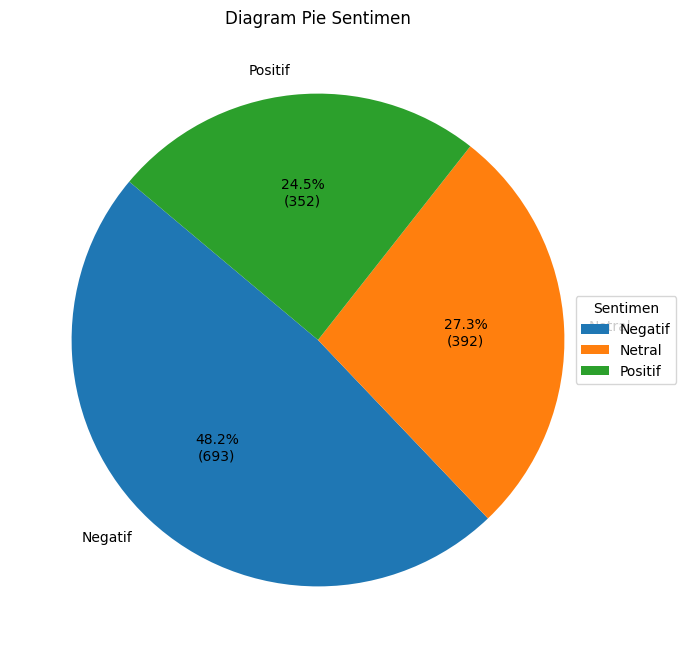

In [98]:
plt.figure(figsize=(8, 8))
plt.pie(sentimen_counts, labels=sentimen_counts.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(sentimen_counts) / 100),
        startangle=140)

plt.legend(sentimen_counts.index, title='Sentimen', loc='center', bbox_to_anchor=(1, 0.5))
plt.title('Diagram Pie Sentimen')

**Wordcloud Keseluruhan Data**

tahap ini menggabungkan semua data text pada kolom to_sentence menjadi satu string tunggal. kemudian kata dihitung frekuensinya dengan menggunakan Counter, dan menampilkan hasil 20 kata yang memiliki frekuensi paling banyak (notes: bisa diubah sesuai keinginan untuk menampilkan top_words). kemudian membuat wordcloud dan memvisualisasikannya kedalam gambar dengan matplotlib.




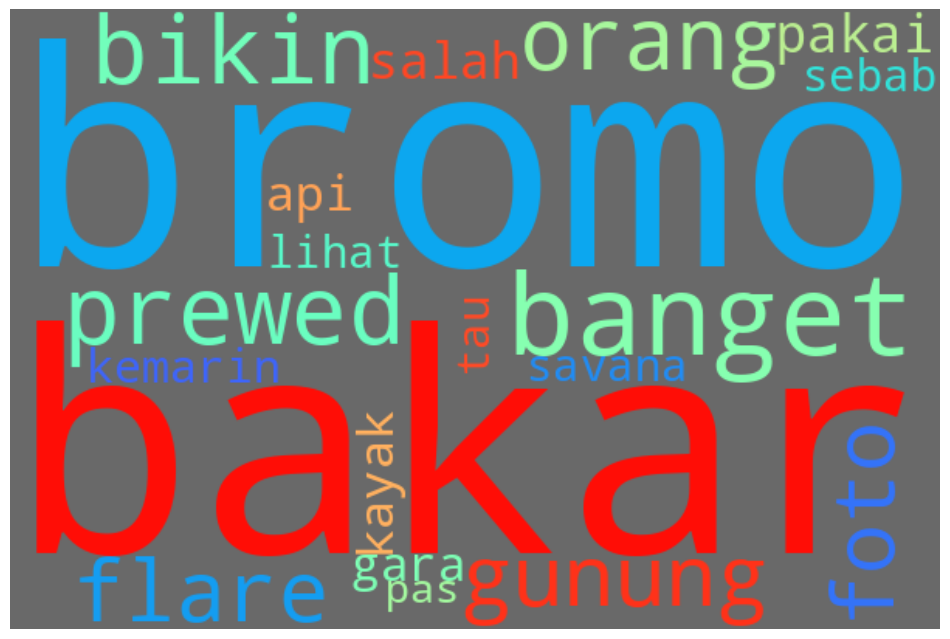

In [99]:
all_text = " ".join(df["to_sentence"])

word_counts = Counter(all_text.split())
top_words = word_counts.most_common(20)     #Membuat WordCloud dengan batasan 20 kata (bisa diubah)

wordcloud_data = {word: freq for word, freq in top_words}

cloud = WordCloud(
    colormap="rainbow",
    width=600,
    height=400,
    background_color='dimgray'
).generate_from_frequencies(wordcloud_data)

fig = plt.figure(figsize=(12, 10))

plt.axis("off")
plt.imshow(cloud, interpolation='bilinear')
plt.show()

Menampilkan frekuensi kata kedalam dataframe (tabel).

In [100]:
# Jumlah Frekuensi Kata
df["mytext_new"] = df['to_sentence'].str.lower().str.replace('[^\w\s]', '')

new_df = df.mytext_new.str.split(expand=True).stack().value_counts().reset_index()
new_df.columns = ['Word', 'Frequency']

# Save the DataFrame ke CSV file
csv_filename = 'Frekuensi Kata Wordcloud Keseluruhan Data.csv'
new_df.to_csv(csv_filename, index=False)

new_df

,Word,Frequency
0,bakar,1641
1,bromo,1596
2,banget,235
3,prewed,222
4,bikin,220
...,...,...
3425,seksual,1
3426,pelangi,1
3427,kaum,1
3428,duuh,1


Membuat visualisasi berupa bar plot untuk frekuensi kata sebelumnya.

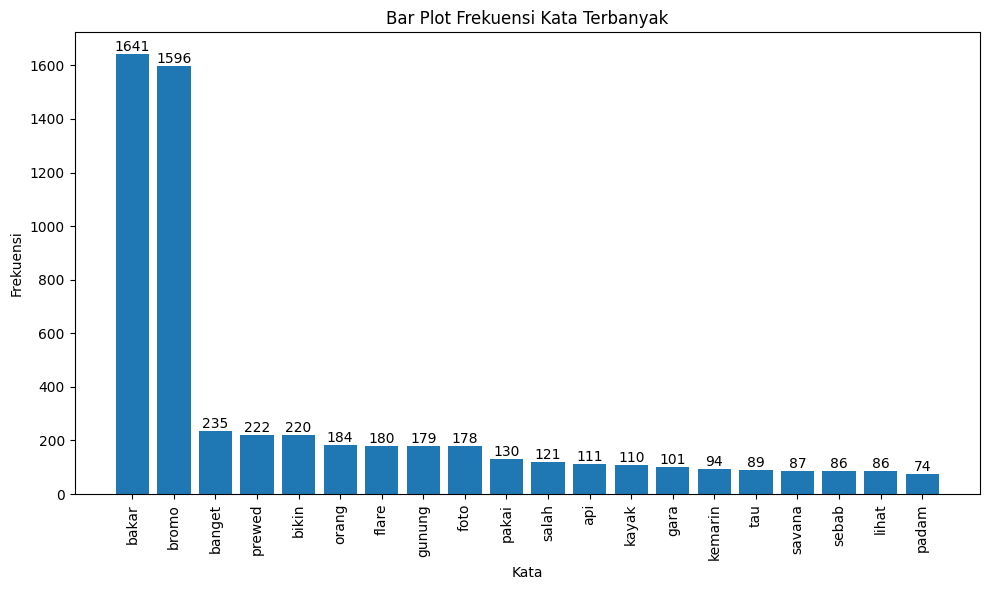

In [101]:
# Menghitung frekuensi kata pada kolom 'clean_data_tweets'
word_freq = df['to_sentence'].str.lower().str.replace('[^\w\s]', '').str.split(expand=True).stack().value_counts()

# Membuat DataFrame baru dari frekuensi kata
new_df = pd.DataFrame({'Word': word_freq.index, 'Frequency': word_freq.values})

# Mengurutkan DataFrame berdasarkan frekuensi kata secara menurun
new_df = new_df.sort_values(by='Frequency', ascending=False)

# Membuat Bar Plot dari data frekuensi kata terbanyak
plt.figure(figsize=(10, 6))
bars = plt.bar(new_df['Word'][:20], new_df['Frequency'][:20])  # Menampilkan 20 kata top frekuensi
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Bar Plot Frekuensi Kata Terbanyak')
plt.xticks(rotation=90)
plt.tight_layout()

# Menambahkan keterangan teks di atas setiap batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()

Chartpie

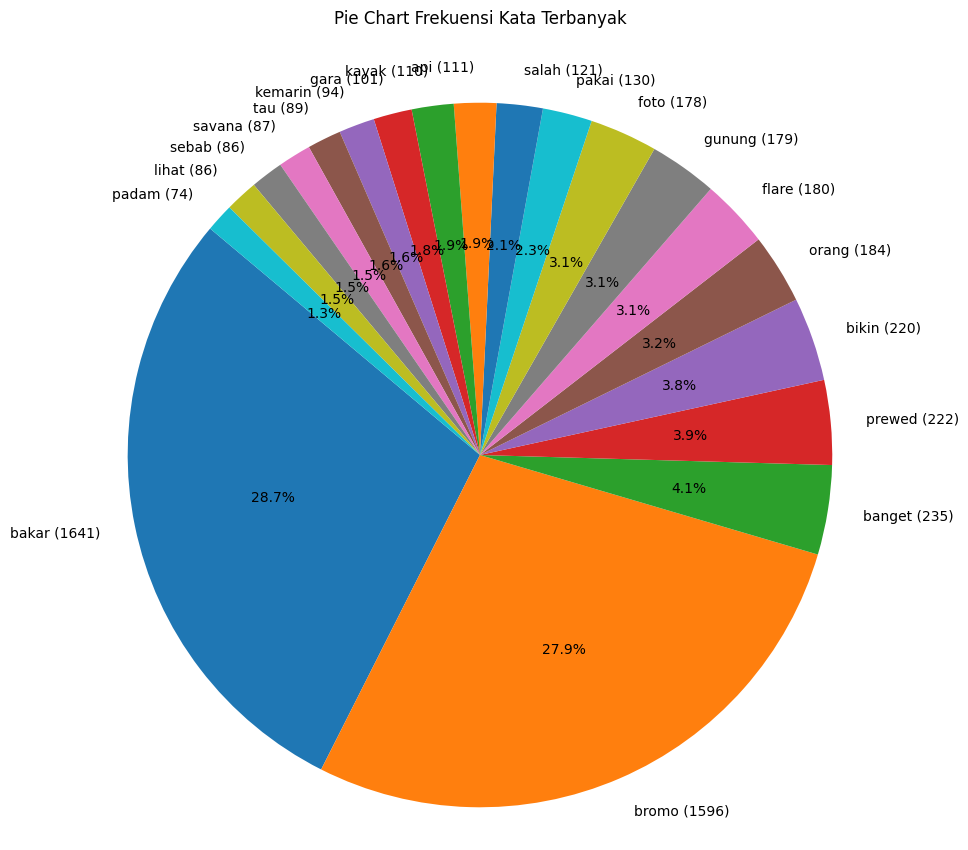

In [102]:
# Menghitung frekuensi kata pada kolom 'to_sentence'
word_freq = df['to_sentence'].str.lower().str.replace('[^\w\s]', '').str.split(expand=True).stack().value_counts()

# Membuat DataFrame baru dari frekuensi kata
new_df = pd.DataFrame({'Word': word_freq.index, 'Frequency': word_freq.values})

# Mengurutkan DataFrame berdasarkan frekuensi kata secara menurun
new_df = new_df.sort_values(by='Frequency', ascending=False)

# Membuat Pie Chart dari data frekuensi kata terbanyak
plt.figure(figsize=(10, 10))
# Menambahkan informasi frekuensi pada label
labels = [f"{word} ({freq})" for word, freq in zip(new_df['Word'][:20], new_df['Frequency'][:20])]
plt.pie(new_df['Frequency'][:20], labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart Frekuensi Kata Terbanyak', y=1.05)
plt.axis('equal')  # Mengatur aspek rasio menjadi sama untuk membuat lingkaran

plt.show()

**Wordcloud Sentimen Positif**

Untuk code diawal memfilter terlebih dahulu sentimen positif pada kolom clean_data_tweets. Kemudian digabungkan menjadi satu string, dan selanjutnya proses sama seperti sebelumnya.

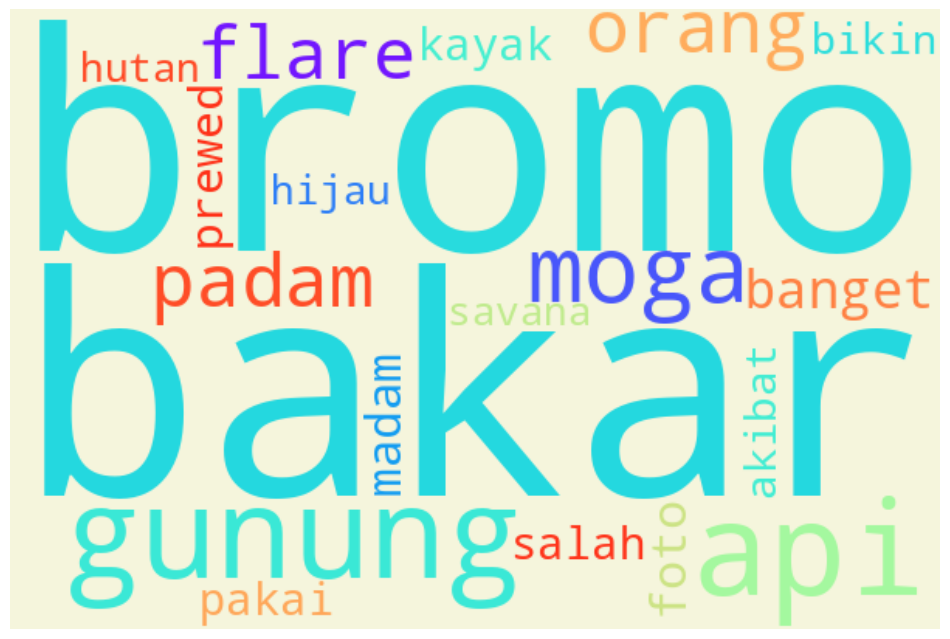

In [103]:
# Filter data berdasarkan sentimen 'positive'
sentimen_positive = df.loc[df['Label'].isin(['Positif']), 'to_sentence']

# Menggabungkan semua teks dari data yang telah difilter
combined_text = ' '.join(sentimen_positive)

word_counts = Counter(combined_text.split())
top_words = word_counts.most_common(20)     # Membuat WordCloud dengan batasan 20 kata

wordcloud_data = {word: freq for word, freq in top_words}

cloud = WordCloud(
    colormap="rainbow",
    width=600,
    height=400,
    background_color='beige'
).generate_from_frequencies(wordcloud_data)

fig = plt.figure(figsize=(12, 10))

plt.axis("off")
plt.imshow(cloud, interpolation='bilinear')
plt.show()

Menampilkan frekuensi kata yang mengandung Sentimen positif kedalam dataframe (tabel).

In [104]:
# Membuat DataFrame baru dari frekuensi kata
new_df_positive = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# Mengurutkan DataFrame berdasarkan frekuensi kata secara menurun
new_df_positive = new_df_positive.sort_values(by='Frequency', ascending=False)

# Save the DataFrame ke CSV file
csv_filename = 'Frekuensi Kata Wordcloud Sentiemen Positif.csv'
new_df_positive.to_csv(csv_filename, index=False)

new_df_positive

,Word,Frequency
6,bakar,395
10,bromo,389
19,api,51
27,gunung,49
49,moga,49
...,...,...
847,simaksi,1
848,inisial,1
849,tetap,1
851,flarebromo,1


Membuat bar plot dari frekuensi kata Sentimen Positif.

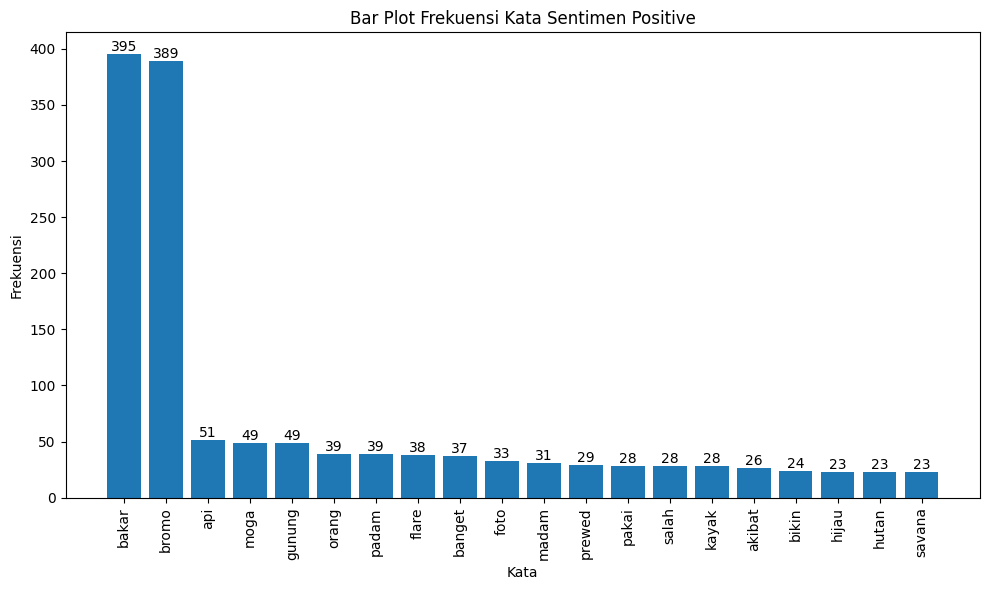

In [105]:
# Filter data berdasarkan sentimen 'positive'
sentimen_postive = df.loc[df['Label'].isin(['Positif']), 'to_sentence']

# Menggabungkan semua teks dari data yang telah difilter
combined_text = ' '.join(sentimen_postive)
word_freq = pd.Series(combined_text.lower().split()).value_counts()

new_df = pd.DataFrame({'Word': word_freq.index, 'Frequency': word_freq.values})
new_df = new_df.sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(new_df['Word'][:20], new_df['Frequency'][:20])      # Menampilkan 20 kata top frekuensi
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Bar Plot Frekuensi Kata Sentimen Positive')
plt.xticks(rotation=90)
plt.tight_layout()

# Menambahkan keterangan teks di atas setiap batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()

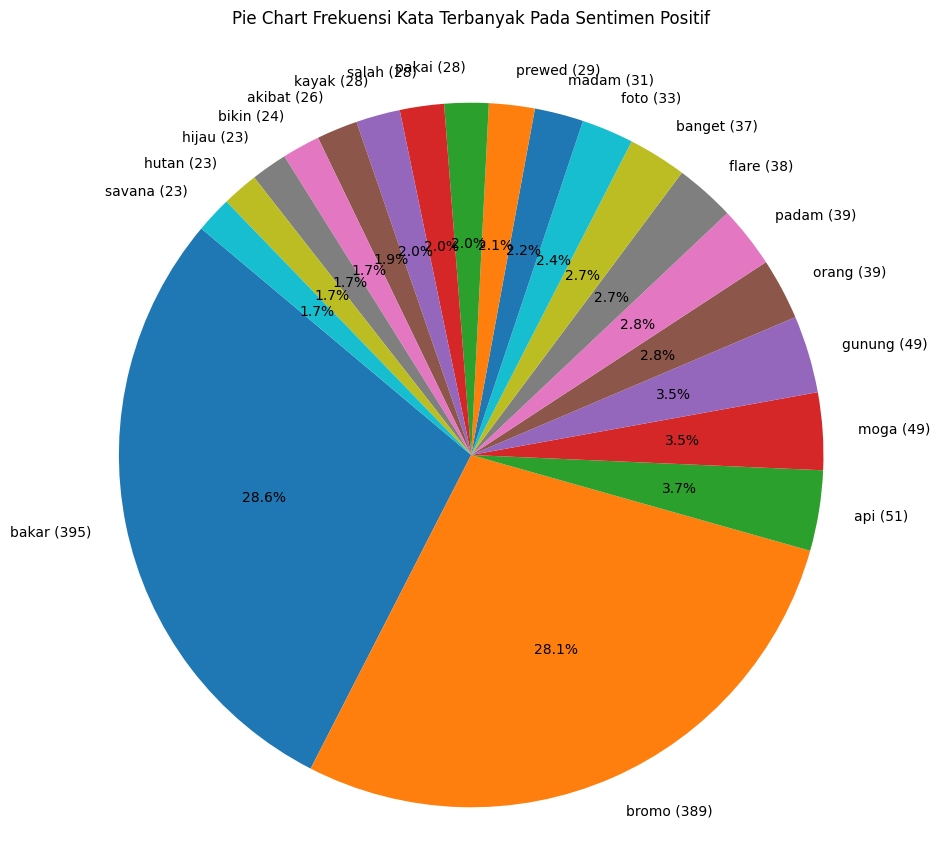

In [106]:
# Filter data berdasarkan sentimen 'positive'
sentimen_positive = df.loc[df['Label'].isin(['Positif']), 'to_sentence']

# Menggabungkan semua teks dari data yang telah difilter
combined_text = ' '.join(sentimen_positive)
word_freq = pd.Series(combined_text.lower().split()).value_counts()

new_df = pd.DataFrame({'Word': word_freq.index, 'Frequency': word_freq.values})
new_df = new_df.sort_values(by='Frequency', ascending=False)

# Membuat Pie Chart dari data frekuensi kata terbanyak
plt.figure(figsize=(10, 10))
# Menambahkan informasi frekuensi pada label
labels = [f"{word} ({freq})" for word, freq in zip(new_df['Word'][:20], new_df['Frequency'][:20])]
plt.pie(new_df['Frequency'][:20], labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart Frekuensi Kata Terbanyak Pada Sentimen Positif', y=1.05)
plt.axis('equal')  # Mengatur aspek rasio menjadi sama untuk membuat lingkaran

plt.show()

**Wordcloud Sentimen Netral**

Membuat Wordcloud Sentimen Netral.

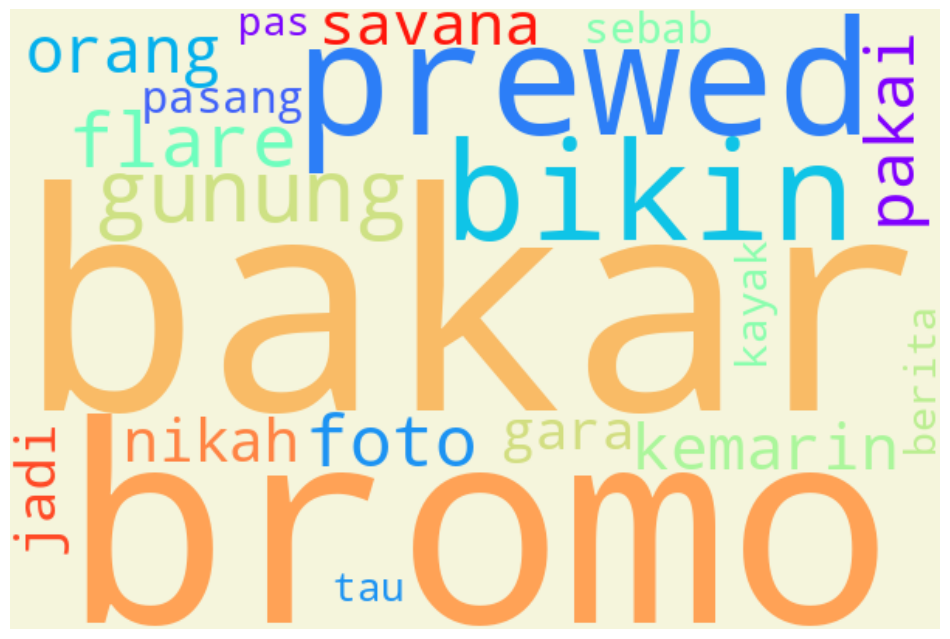

In [107]:
# Filter data berdasarkan sentimen 'netral'
sentimen_netral = df.loc[df['Label'].isin(['Netral']), 'to_sentence']

# Menggabungkan semua teks dari data yang telah difilter
combined_text = ' '.join(sentimen_netral)

word_counts = Counter(combined_text.split())
top_words = word_counts.most_common(20)     # Membuat WordCloud dengan batasan 20 kata

wordcloud_data = {word: freq for word, freq in top_words}

cloud = WordCloud(
    colormap="rainbow",
    width=600,
    height=400,
    background_color='beige'
).generate_from_frequencies(wordcloud_data)

fig = plt.figure(figsize=(12, 10))

plt.axis("off")
plt.imshow(cloud, interpolation='bilinear')
plt.show()

Menampilkan frekuensi kata yang mengandung Sentimen netral kedalam dataframe (tabel).

In [108]:
# Membuat DataFrame baru dari frekuensi kata
new_df_netral = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# Mengurutkan DataFrame berdasarkan frekuensi kata secara menurun
new_df_netral = new_df_netral.sort_values(by='Frequency', ascending=False)

# Save the DataFrame ke CSV file
csv_filename = 'Frekuensi Kata Wordcloud Sentiemen Netral.csv'
new_df_netral.to_csv(csv_filename, index=False)

new_df_netral

,Word,Frequency
4,bakar,438
7,bromo,423
48,prewed,65
10,bikin,57
22,gunung,55
...,...,...
78,biar,1
588,agustus,1
589,rombong,1
590,bukut,1


Membuat bar plot dari frekuensi kata Sentimen Netral.

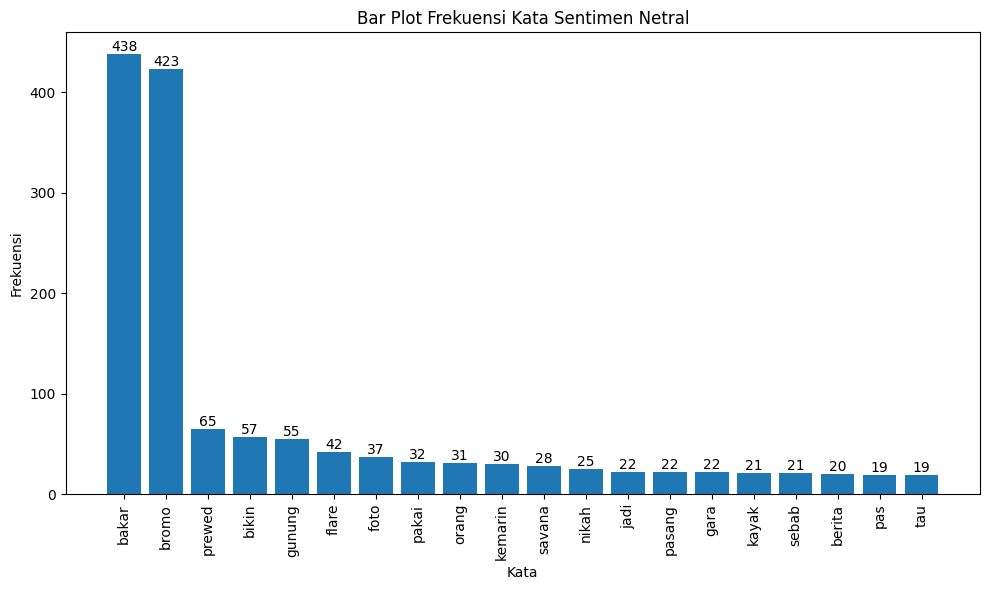

In [109]:
# Filter data berdasarkan sentimen 'netral'
sentimen_netral = df.loc[df['Label'].isin(['Netral']), 'to_sentence']

# Menggabungkan semua teks dari data yang telah difilter
combined_text = ' '.join(sentimen_netral)
word_freq = pd.Series(combined_text.lower().split()).value_counts()

new_df = pd.DataFrame({'Word': word_freq.index, 'Frequency': word_freq.values})
new_df = new_df.sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(new_df['Word'][:20], new_df['Frequency'][:20])      # Menampilkan 20 kata top frekuensi
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Bar Plot Frekuensi Kata Sentimen Netral')
plt.xticks(rotation=90)
plt.tight_layout()

# Menambahkan keterangan teks di atas setiap batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()

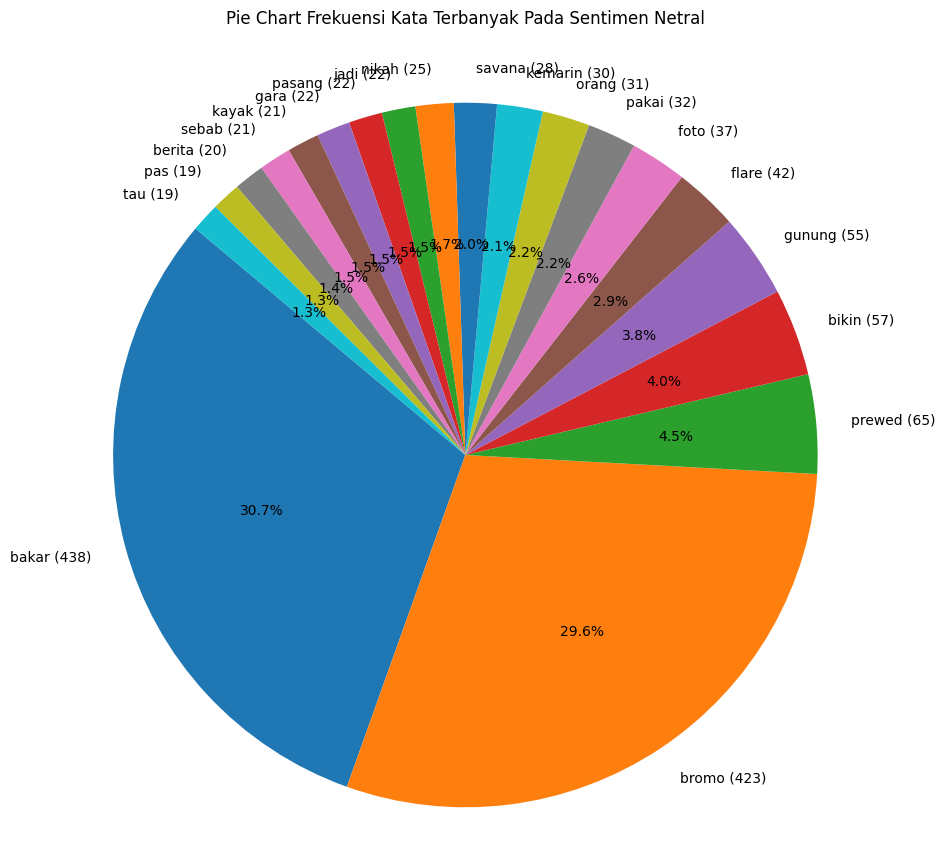

In [110]:
# Filter data berdasarkan sentimen 'netral'
sentimen_netral = df.loc[df['Label'].isin(['Netral']), 'to_sentence']

# Menggabungkan semua teks dari data yang telah difilter
combined_text = ' '.join(sentimen_netral)
word_freq = pd.Series(combined_text.lower().split()).value_counts()

new_df = pd.DataFrame({'Word': word_freq.index, 'Frequency': word_freq.values})
new_df = new_df.sort_values(by='Frequency', ascending=False)

# Membuat Pie Chart dari data frekuensi kata terbanyak
plt.figure(figsize=(10, 10))
# Menambahkan informasi frekuensi pada label
labels = [f"{word} ({freq})" for word, freq in zip(new_df['Word'][:20], new_df['Frequency'][:20])]
plt.pie(new_df['Frequency'][:20], labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart Frekuensi Kata Terbanyak Pada Sentimen Netral', y=1.05)
plt.axis('equal')  # Mengatur aspek rasio menjadi sama untuk membuat lingkaran

plt.show()

**Wordcloud Sentimen Negatif**

Membuat Wordcloud Sentimen Negatif.

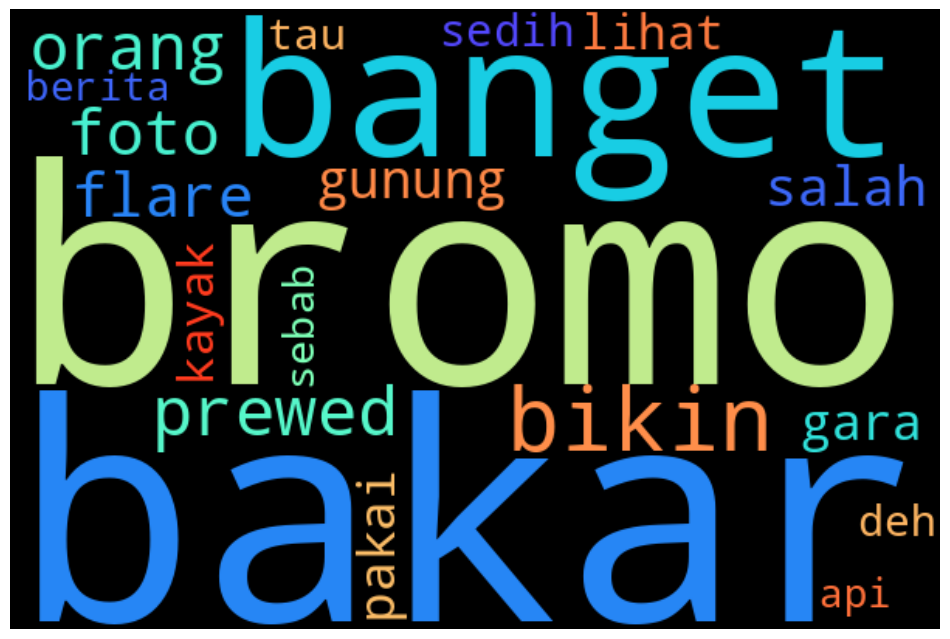

In [111]:
# Filter data berdasarkan sentimen 'negative'
sentimen_negative = df.loc[df['Label'].isin(['Negatif']), 'to_sentence']

# Menggabungkan semua teks dari data yang telah difilter
combined_text = ' '.join(sentimen_negative)

word_counts = Counter(combined_text.split())
top_words = word_counts.most_common(20)     # Membuat WordCloud dengan batasan 20 kata

wordcloud_data = {word: freq for word, freq in top_words}

cloud = WordCloud(
    colormap="rainbow",
    width=600,
    height=400,
    background_color='black'
).generate_from_frequencies(wordcloud_data)

fig = plt.figure(figsize=(12, 10))

plt.axis("off")
plt.imshow(cloud, interpolation='bilinear')
plt.show()

Menampilkan frekuensi kata yang mengandung Sentimen negatif kedalam dataframe (tabel).

In [112]:
# Membuat DataFrame baru dari frekuensi kata
new_df_negative = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# Mengurutkan DataFrame berdasarkan frekuensi kata secara menurun
new_df_negative = new_df_negative.sort_values(by='Frequency', ascending=False)

# Save the DataFrame ke CSV file
csv_filename = 'Frekuensi Kata Wordcloud Sentiemen Negatif.csv'
new_df_negative.to_csv(csv_filename, index=False)

new_df_negative

,Word,Frequency
3,bakar,808
5,bromo,784
38,banget,188
36,bikin,139
1,prewed,128
...,...,...
1049,konstribusi,1
1048,dkit,1
1046,auah,1
1043,ckckck,1


Membuat bar plot dari frekuensi kata Sentimen Negatif.

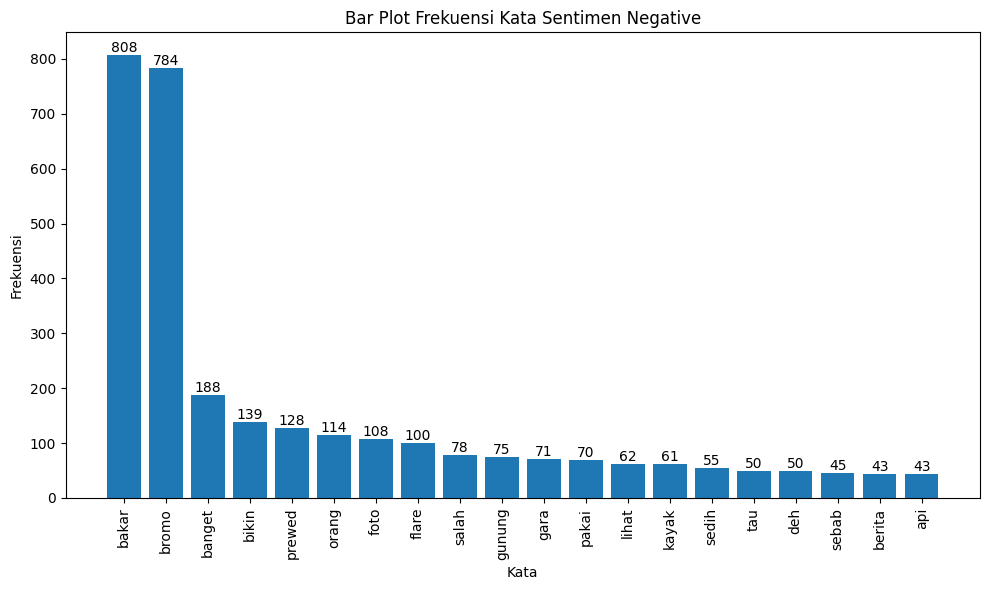

In [113]:
# Filter data berdasarkan sentimen 'negative'
sentimen_negative = df.loc[df['Label'].isin(['Negatif']), 'to_sentence']

# Menggabungkan semua teks dari data yang telah difilter
combined_text = ' '.join(sentimen_negative)
word_freq = pd.Series(combined_text.lower().split()).value_counts()

new_df = pd.DataFrame({'Word': word_freq.index, 'Frequency': word_freq.values})

new_df = new_df.sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(new_df['Word'][:20], new_df['Frequency'][:20])      # Menampilkan 20 kata top frekuensi
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Bar Plot Frekuensi Kata Sentimen Negative')
plt.xticks(rotation=90)
plt.tight_layout()

# Menambahkan keterangan teks di atas setiap batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()

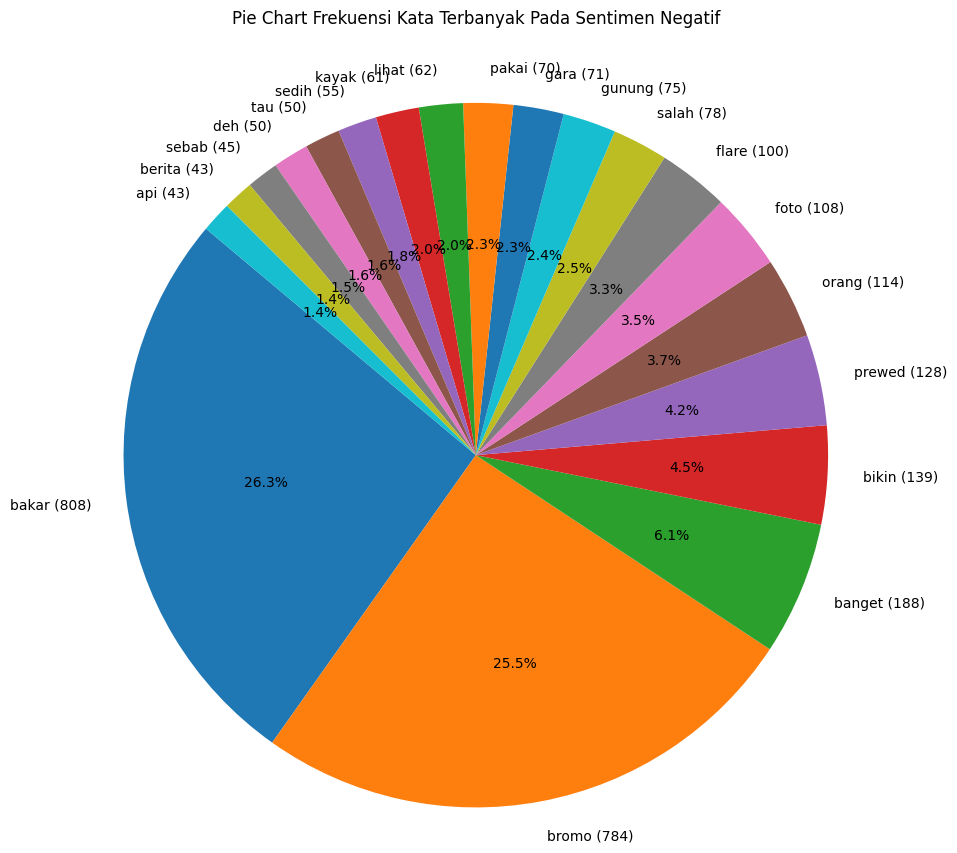

In [114]:
# Filter data berdasarkan sentimen 'negatif'
sentimen_negatif = df.loc[df['Label'].isin(['Negatif']), 'to_sentence']

# Menggabungkan semua teks dari data yang telah difilter
combined_text = ' '.join(sentimen_negatif)
word_freq = pd.Series(combined_text.lower().split()).value_counts()

new_df = pd.DataFrame({'Word': word_freq.index, 'Frequency': word_freq.values})
new_df = new_df.sort_values(by='Frequency', ascending=False)

# Membuat Pie Chart dari data frekuensi kata terbanyak
plt.figure(figsize=(10, 10))
# Menambahkan informasi frekuensi pada label
labels = [f"{word} ({freq})" for word, freq in zip(new_df['Word'][:20], new_df['Frequency'][:20])]
plt.pie(new_df['Frequency'][:20], labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart Frekuensi Kata Terbanyak Pada Sentimen Negatif', y=1.05)
plt.axis('equal')  # Mengatur aspek rasio menjadi sama untuk membuat lingkaran

plt.show()